In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ffn as ffn
import datetime
import time
plt.style.use('seaborn')
%matplotlib inline

/Users/yvette/opt/anaconda3/lib/python3.8/site-packages/ffn/core.py:27: MatplotlibDeprecationWarning: The 'warn' parameter of use() is deprecated since Matplotlib 3.1 and will be removed in 3.3.  If any parameter follows 'warn', they should be pass as keyword, not positionally.
  matplotlib.use('agg', warn=False)


In [6]:
company = pd.read_excel('航運業公司.xlsx', sheet_name='工作表1')
code_name = company['公司簡稱'].str.split(' ', 2, expand=True)

company['公司簡稱'] = code_name[0]
company.columns = ['Code', 'Industry_Code', 'Industry', 'TSE_OTC']
company['Company'] = code_name[1]

In [10]:
company[(company.Industry == '海運') & (company.TSE_OTC == 'TSE')].to_excel('company.xlsx')

In [3]:
# 將海運業的代碼及名稱取出
name_list = company[(company.Industry == '海運') & (company.TSE_OTC == 'TSE')].Company.tolist()
code_list = company[(company.Industry == '海運') & (company.TSE_OTC == 'TSE')].Code.tolist()

start_day = '2016-01-01'
end_day = '2021-01-07'

close_df = pd.DataFrame()

for i in code_list:
   data1 = ffn.get('{}.tw'.format(i),start=start_day,end=end_day)
   close_df = pd.concat([close_df,data1],axis=1)
    
close_df.to_csv('shipping_industry-close_df.csv')

In [4]:
close_df = pd.read_csv('shipping_industry-close_df.csv')

In [5]:
close_df

Date     2603tw     2605tw     2606tw     2609tw     2612tw  \
0     2016-01-04  11.726857  16.088526  20.918205  17.487947  24.095766   
1     2016-01-05  11.726857  16.375090  20.355024  17.340815  24.095766   
2     2016-01-06  11.543625  16.497902  20.515932  17.235718  23.576960   
3     2016-01-07  11.360394  16.375090  20.234341  16.668201  23.173443   
4     2016-01-08  11.406201  16.661654  20.395252  16.794315  23.346376   
...          ...        ...        ...        ...        ...        ...   
1217  2020-12-31  40.700001  22.700001  36.900002  29.250000  35.299999   
1218  2021-01-04  44.750000  23.350000  36.700001  32.150002  36.099998   
1219  2021-01-05  45.500000  22.850000  37.150002  32.000000  35.450001   
1220  2021-01-06  42.549999  21.100000  35.750000  28.799999  33.900002   
1221  2021-01-07  38.450001  20.650000  34.799999  25.950001  32.150002   

         2615tw     2617tw     2637tw     5608tw  
0     14.432341  11.262666  27.037563  17.745234  
1     14.059093  11.177984  27.037563  17.669397  
2     14.681177  11.050962  27.335497  17.441895  
3     13.768785  10.458190  26.851355  17.214392  
4     13.851731  10.458190  26.851355  17.366060  
...         ...        ...        ...        ...  
1217  52.900002  21.100000  24.450001  13.000000  
1218  57.099998  22.150000  24.900000  13.100000  
1219  54.599998  21.600000  24.950001  13.000000  
1220  50.299999  20.750000  24.450001  12.200000  
1221  47.349998  20.100000  24.049999  11.400000  

[1222 rows x 10 columns]

In [398]:
time_start = time.time()
time_start

1610589804.448478

In [399]:
close_df.Date = pd.to_datetime(close_df.Date)
close_df.index = close_df.Date
close_df.drop(columns='Date', inplace=True)

In [400]:
close_df

2603tw     2605tw     2606tw     2609tw     2612tw     2615tw  \
Date                                                                           
2016-01-04  11.726857  16.088526  20.918205  17.487947  24.095766  14.432341   
2016-01-05  11.726857  16.375090  20.355024  17.340815  24.095766  14.059093   
2016-01-06  11.543625  16.497902  20.515932  17.235718  23.576960  14.681177   
2016-01-07  11.360394  16.375090  20.234341  16.668201  23.173443  13.768785   
2016-01-08  11.406201  16.661654  20.395252  16.794315  23.346376  13.851731   
...               ...        ...        ...        ...        ...        ...   
2020-12-31  40.700001  22.700001  36.900002  29.250000  35.299999  52.900002   
2021-01-04  44.750000  23.350000  36.700001  32.150002  36.099998  57.099998   
2021-01-05  45.500000  22.850000  37.150002  32.000000  35.450001  54.599998   
2021-01-06  42.549999  21.100000  35.750000  28.799999  33.900002  50.299999   
2021-01-07  38.450001  20.650000  34.799999  25.950001  32.150002  47.349998   

               2617tw     2637tw     5608tw  
Date                                         
2016-01-04  11.262666  27.037563  17.745234  
2016-01-05  11.177984  27.037563  17.669397  
2016-01-06  11.050962  27.335497  17.441895  
2016-01-07  10.458190  26.851355  17.214392  
2016-01-08  10.458190  26.851355  17.366060  
...               ...        ...        ...  
2020-12-31  21.100000  24.450001  13.000000  
2021-01-04  22.150000  24.900000  13.100000  
2021-01-05  21.600000  24.950001  13.000000  
2021-01-06  20.750000  24.450001  12.200000  
2021-01-07  20.100000  24.049999  11.400000  

[1222 rows x 9 columns]

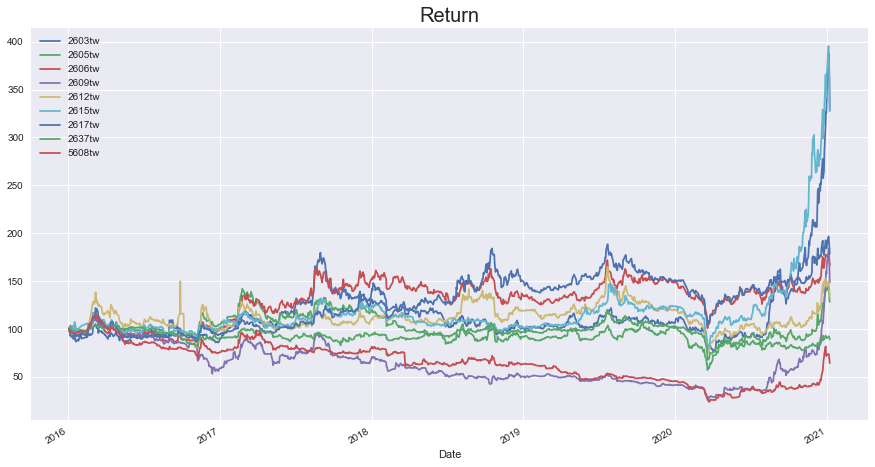

In [411]:
ax1 = close_df.rebase().plot(figsize=(15,8))
plt.title('Return', fontsize=20)
plt.legend()

In [402]:
close_df.rebase()

2603tw      2605tw      2606tw      2609tw      2612tw  \
Date                                                                     
2016-01-04  100.000000  100.000000  100.000000  100.000000  100.000000   
2016-01-05  100.000000  101.781169   97.307700   99.158661  100.000000   
2016-01-06   98.437499  102.544522   98.076923   98.557694   97.846898   
2016-01-07   96.875005  101.781169   96.730768   95.312509   96.172260   
2016-01-08   97.265629  103.562338   97.500010   96.033656   96.889953   
...                ...         ...         ...         ...         ...   
2020-12-31  347.066568  141.094349  176.401374  167.258050  146.498763   
2021-01-04  381.602669  145.134493  175.445266  183.840909  149.818845   
2021-01-05  387.998244  142.026688  177.596505  182.983166  147.121285   
2021-01-06  362.842308  131.149371  170.903763  164.684845  140.688623   
2021-01-07  327.879842  128.352342  166.362261  148.387916  133.425936   

                2615tw      2617tw      2637tw      5608tw  
Date                                                        
2016-01-04  100.000000  100.000000  100.000000  100.000000  
2016-01-05   97.413814   99.248122  100.000000   99.572639  
2016-01-06  101.724159   98.120309  101.101925   98.290589  
2016-01-07   95.402304   92.857146   99.311296   97.008539  
2016-01-08   95.977026   92.857146   99.311296   97.863239  
...                ...         ...         ...         ...  
2020-12-31  366.537923  187.344638   90.429749   73.259109  
2021-01-04  395.639210  196.667469   92.094096   73.822643  
2021-01-05  378.317003  191.784084   92.279028   73.259109  
2021-01-06  348.522811  184.237022   90.429749   68.750855  
2021-01-07  328.082601  178.465745   88.950321   64.242601  

[1222 rows x 9 columns]

Text(0.5, 1.0, 'Adj Close Price')

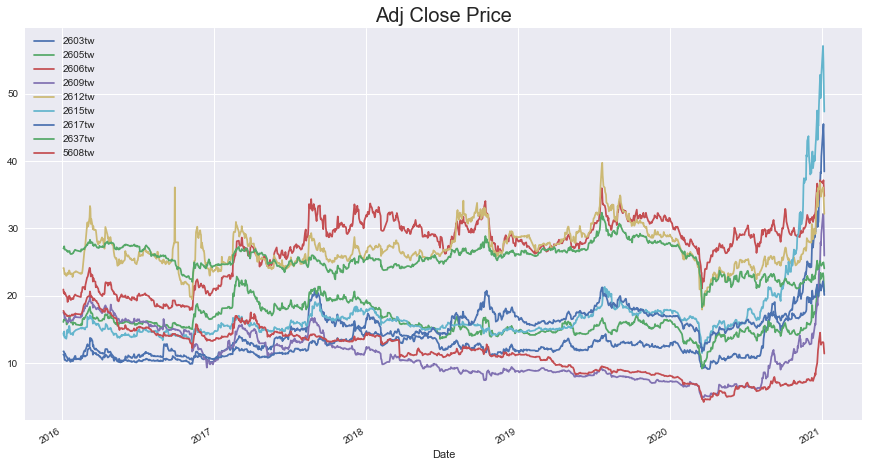

In [10]:
plt.figure(figsize=(15,8))

for code in close_df.columns:
    ax = close_df[code].plot()
    lines = ax.get_lines()

plt.legend(lines, [l.get_label() for l in lines])
plt.title('Adj Close Price', fontsize=20)

In [11]:
close_df.pct_change(1).corr()

2603tw    2605tw    2606tw    2609tw    2612tw    2615tw    2617tw  \
2603tw  1.000000  0.445277  0.447347  0.665665  0.363109  0.553475  0.468999   
2605tw  0.445277  1.000000  0.632122  0.461244  0.544972  0.446576  0.600217   
2606tw  0.447347  0.632122  1.000000  0.413116  0.572539  0.447329  0.596111   
2609tw  0.665665  0.461244  0.413116  1.000000  0.360956  0.484003  0.415438   
2612tw  0.363109  0.544972  0.572539  0.360956  1.000000  0.373565  0.565059   
2615tw  0.553475  0.446576  0.447329  0.484003  0.373565  1.000000  0.452334   
2617tw  0.468999  0.600217  0.596111  0.415438  0.565059  0.452334  1.000000   
2637tw  0.419136  0.538216  0.560887  0.414624  0.471031  0.440453  0.539053   
5608tw  0.440719  0.516943  0.468315  0.525543  0.466019  0.442706  0.495469   

          2637tw    5608tw  
2603tw  0.419136  0.440719  
2605tw  0.538216  0.516943  
2606tw  0.560887  0.468315  
2609tw  0.414624  0.525543  
2612tw  0.471031  0.466019  
2615tw  0.440453  0.442706  
2617tw  0.539053  0.495469  
2637tw  1.000000  0.501234  
5608tw  0.501234  1.000000

Text(0.5, 1.0, 'Close Price Correlation Matrix')

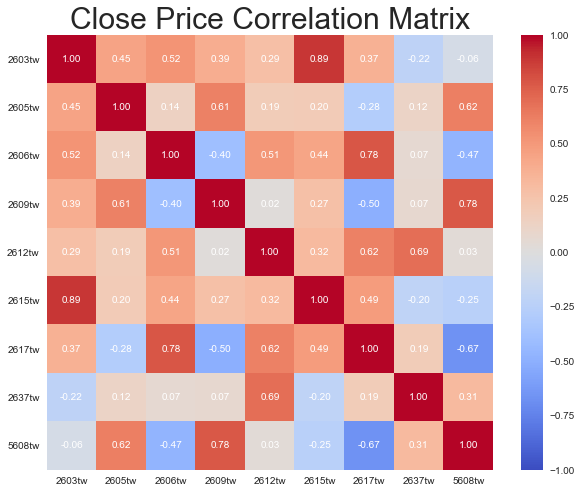

In [12]:
ffn.plot_corr_heatmap(close_df,cmap='coolwarm',figsize=(10,8), dpi=100)
plt.title("Close Price Correlation Matrix",fontsize = 30)

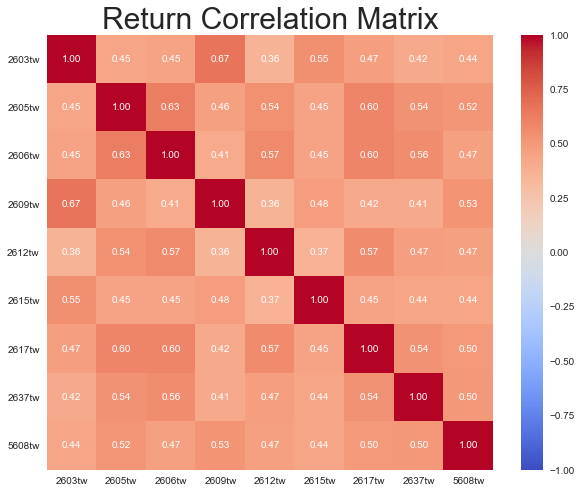

In [13]:
ffn.plot_corr_heatmap(close_df.pct_change(1),cmap='coolwarm',figsize=(10,8), dpi=100)
plt.title("Return Correlation Matrix",fontsize = 30)
plt.show()

In [14]:
# 排列組合，共有36組
from itertools import combinations

corr = close_df.pct_change(1).corr()
pid_list = list(combinations(corr.columns,2))
pid_list[0][0]

'2603tw'

In [17]:
for pid in pid_list:
    x = pid
    
list(x)

['2637tw', '5608tw']

In [18]:
corr = close_df.pct_change(1).corr()
pair_dict = {}
n = 0
for pid in pid_list:
    column = pid[0]
    index = pid[1]
    if (corr[column][index] > 0.45) :
        n += 1
        pair_dict[pid] = close_df[list(pid)]     

In [19]:
n # 相關性高的配對總共有22組

22

<ipython-input-21-028bb615eb14>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15,8),dpi=100)
<ipython-input-21-028bb615eb14>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15,8),dpi=100)


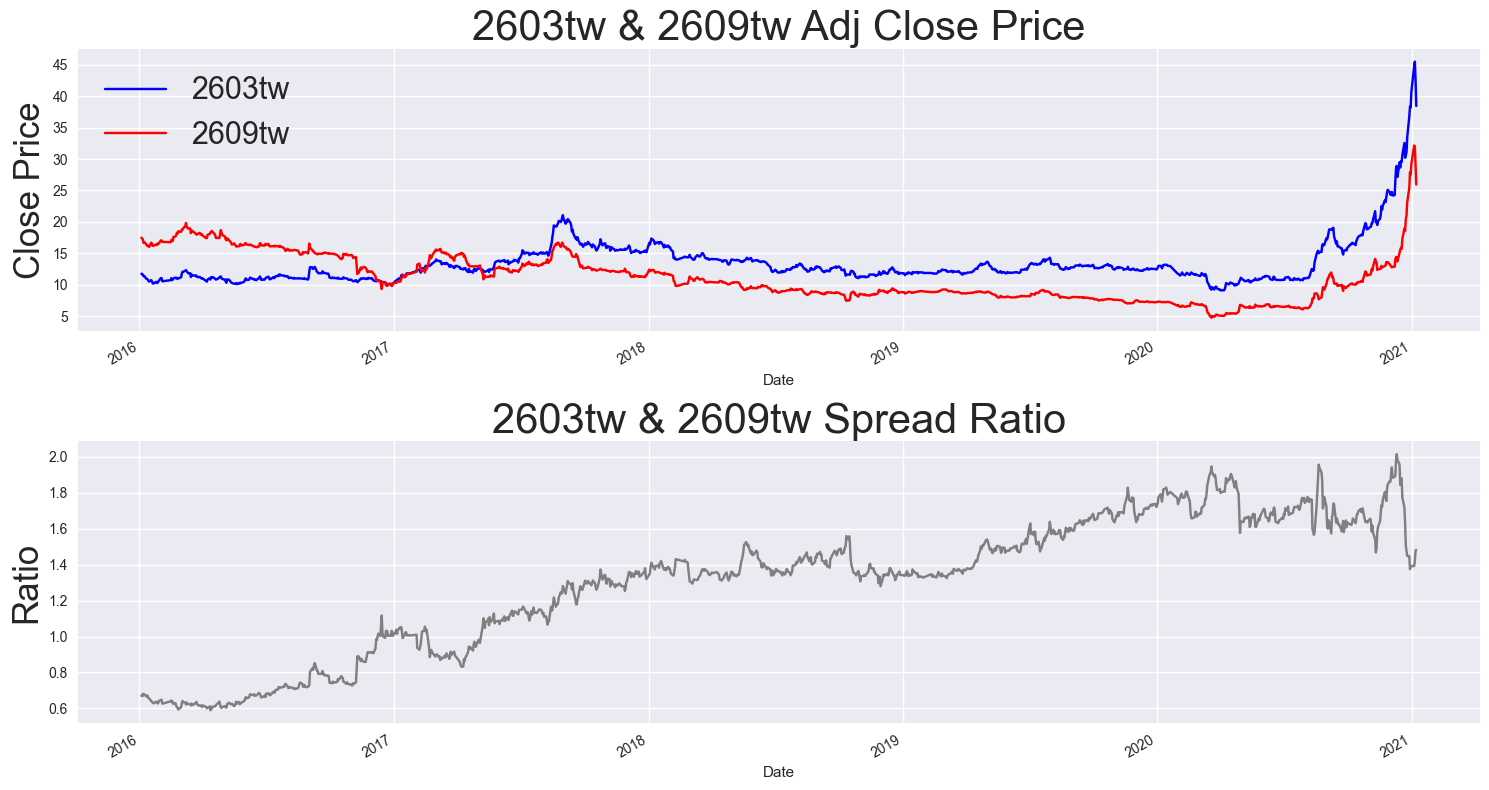

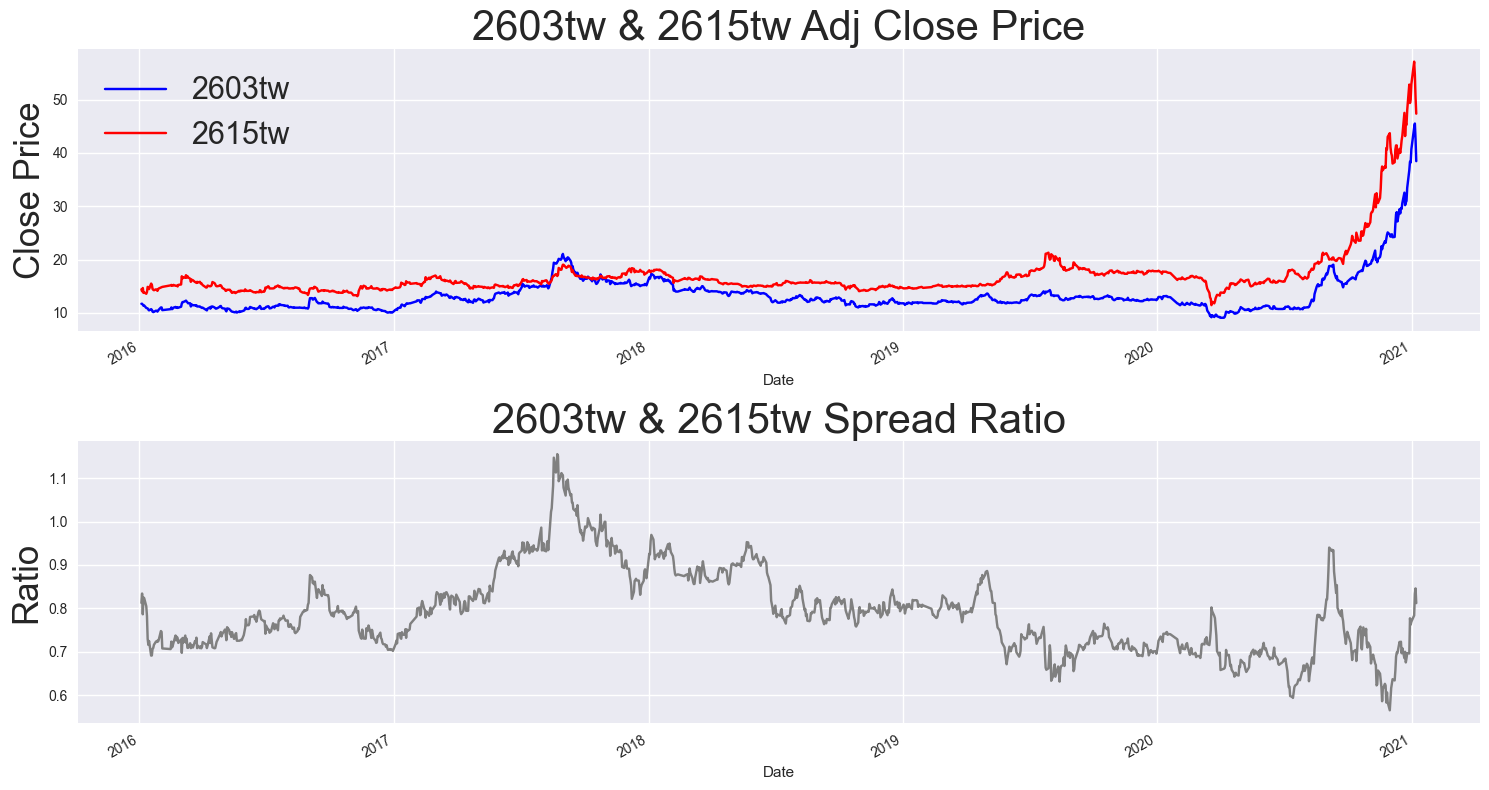

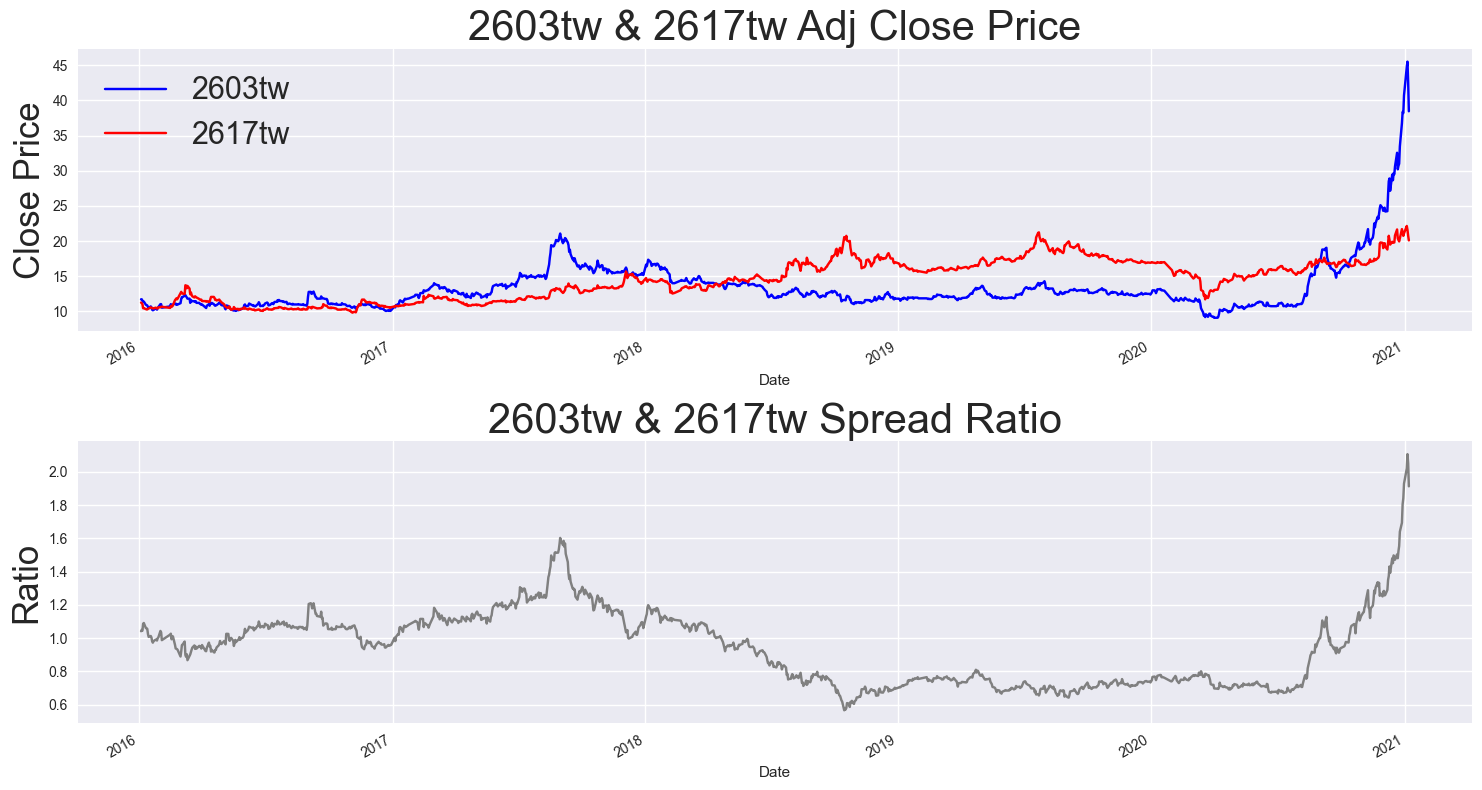

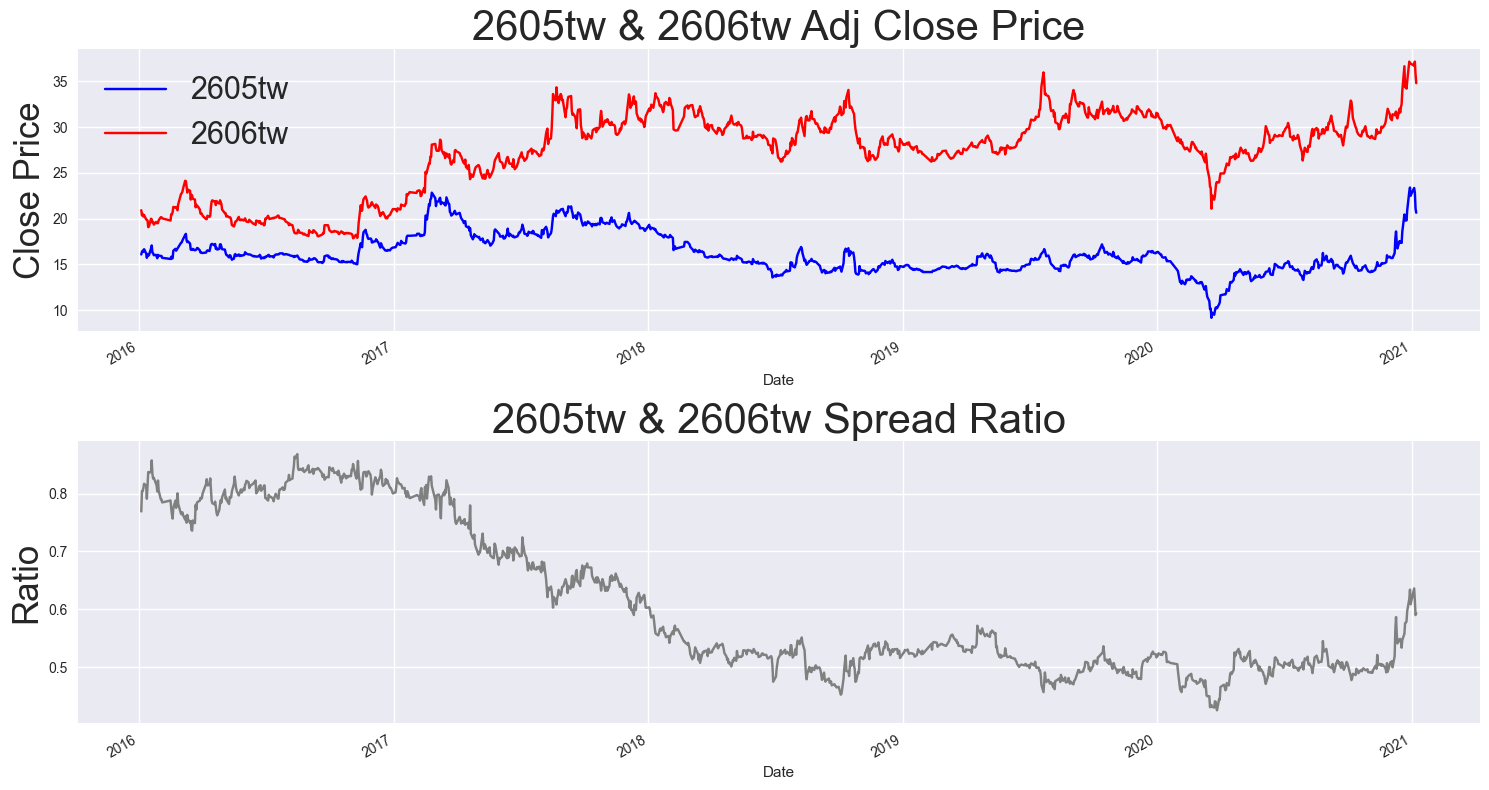

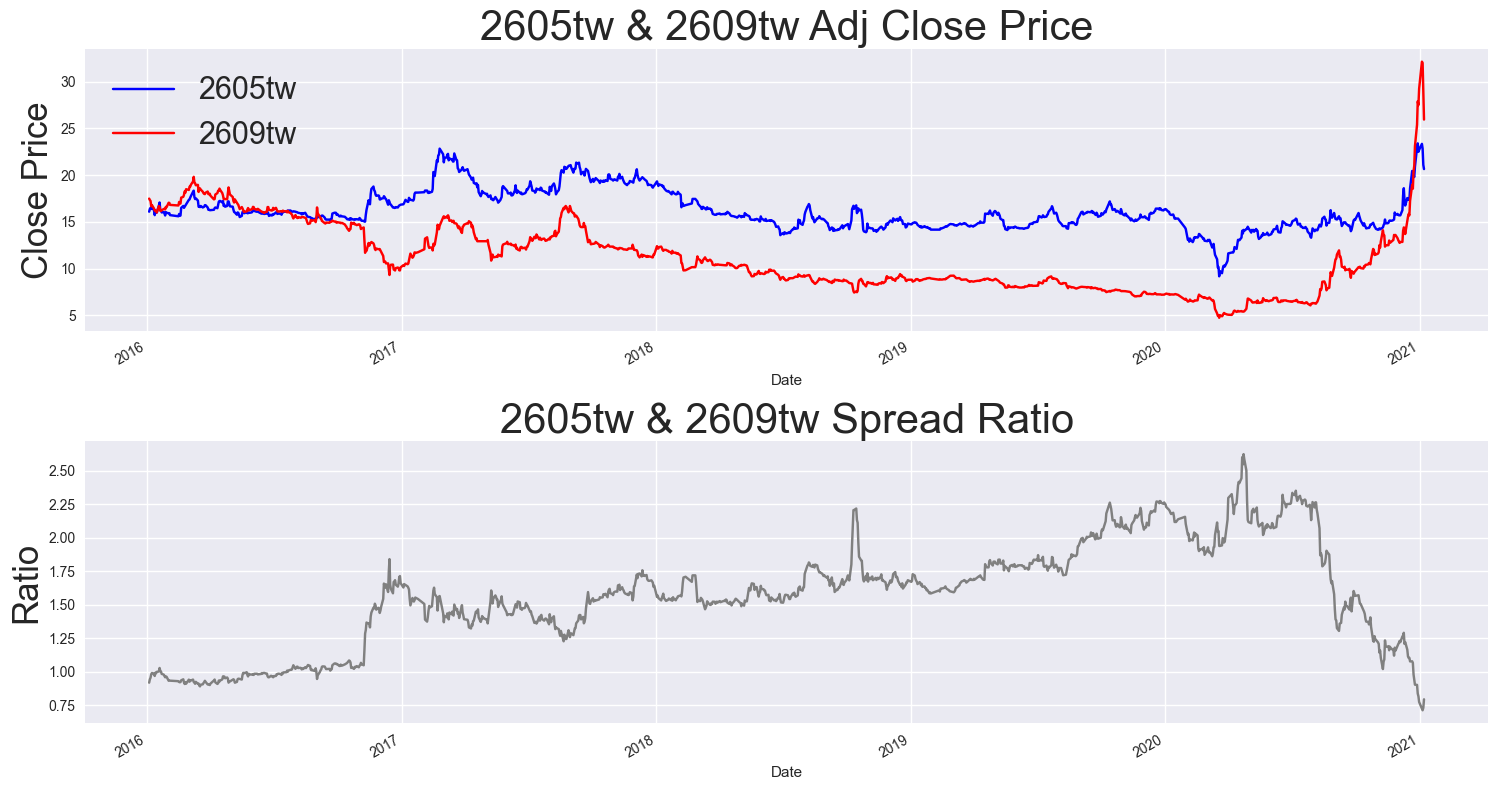

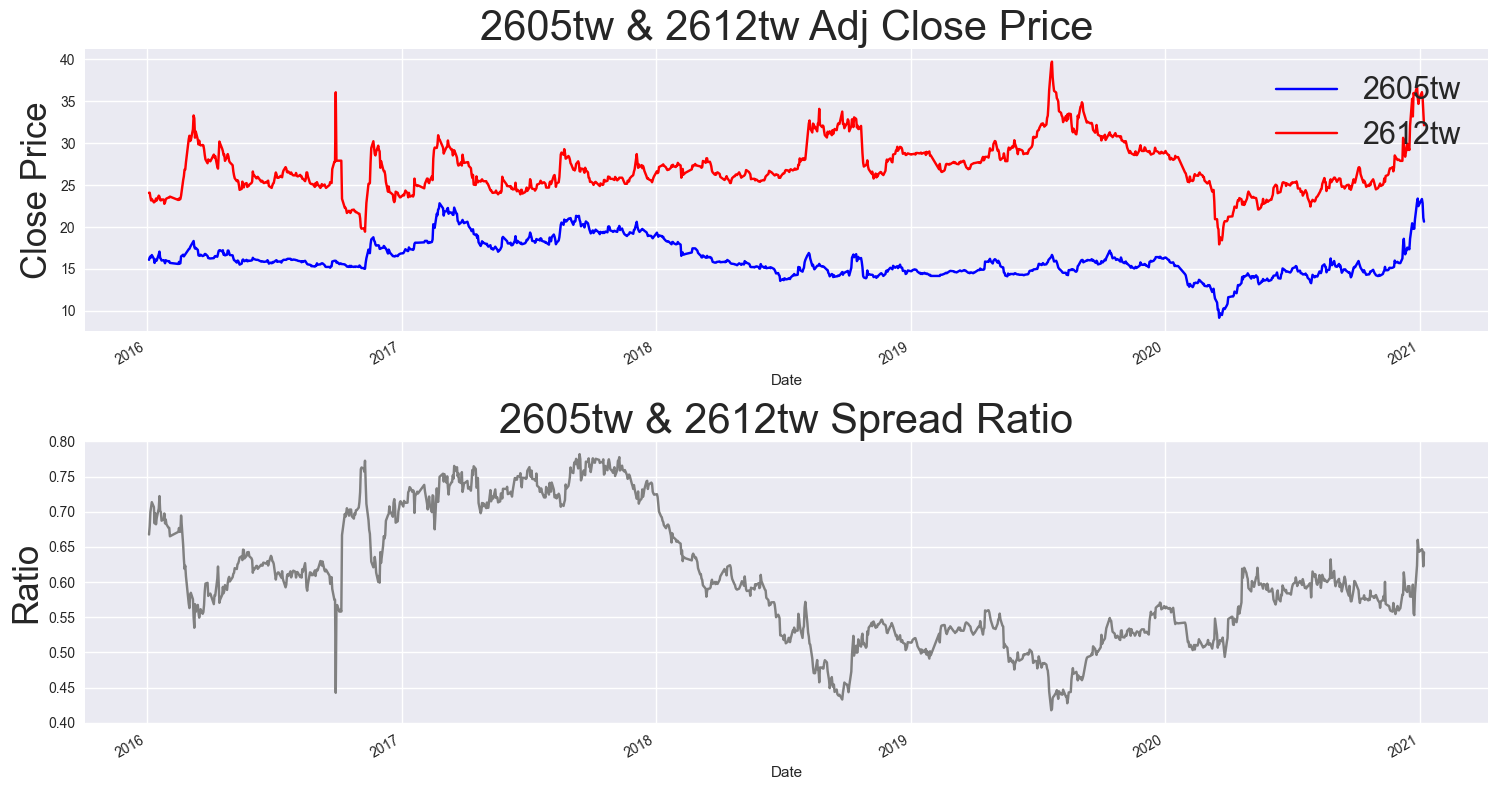

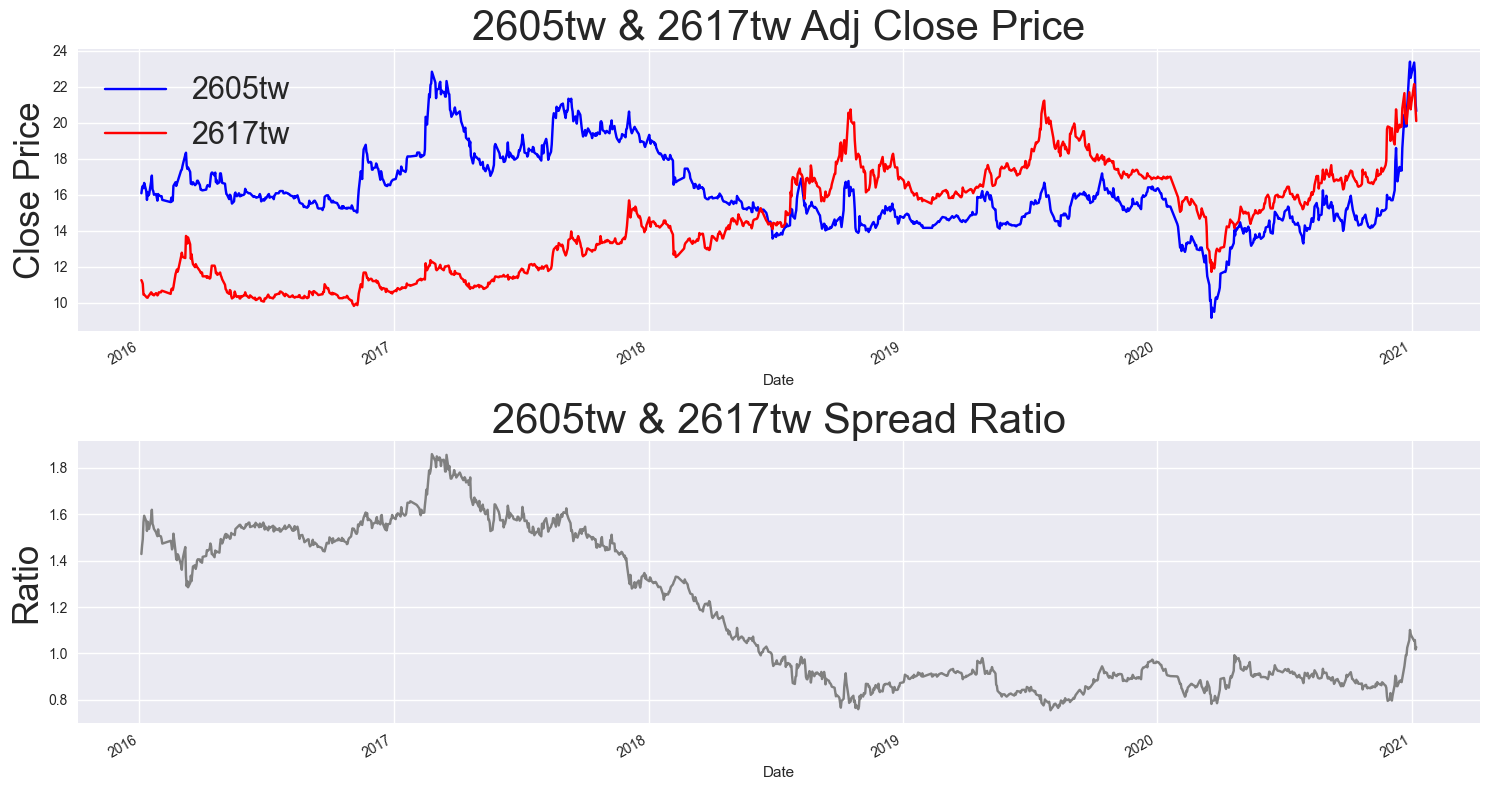

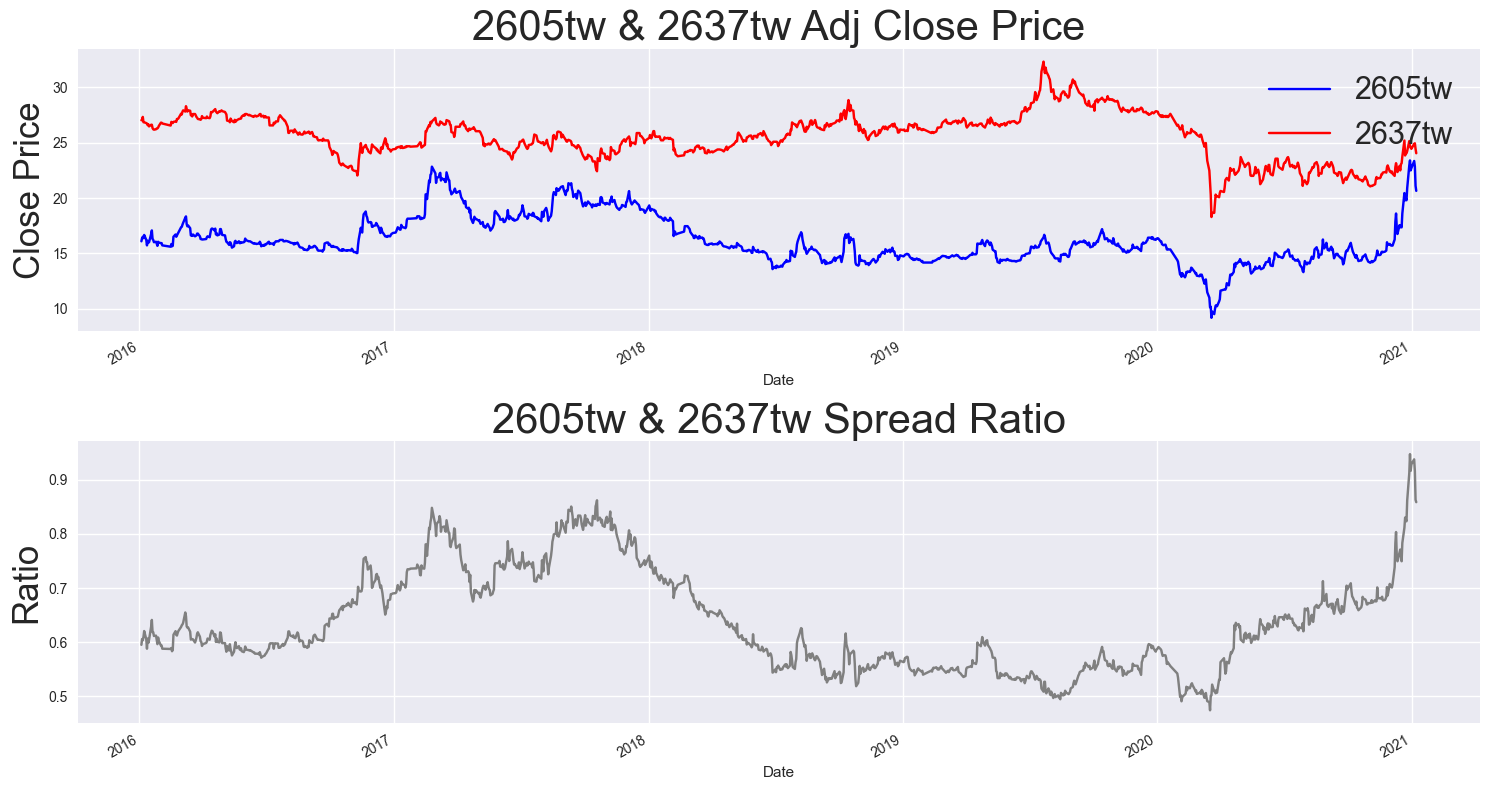

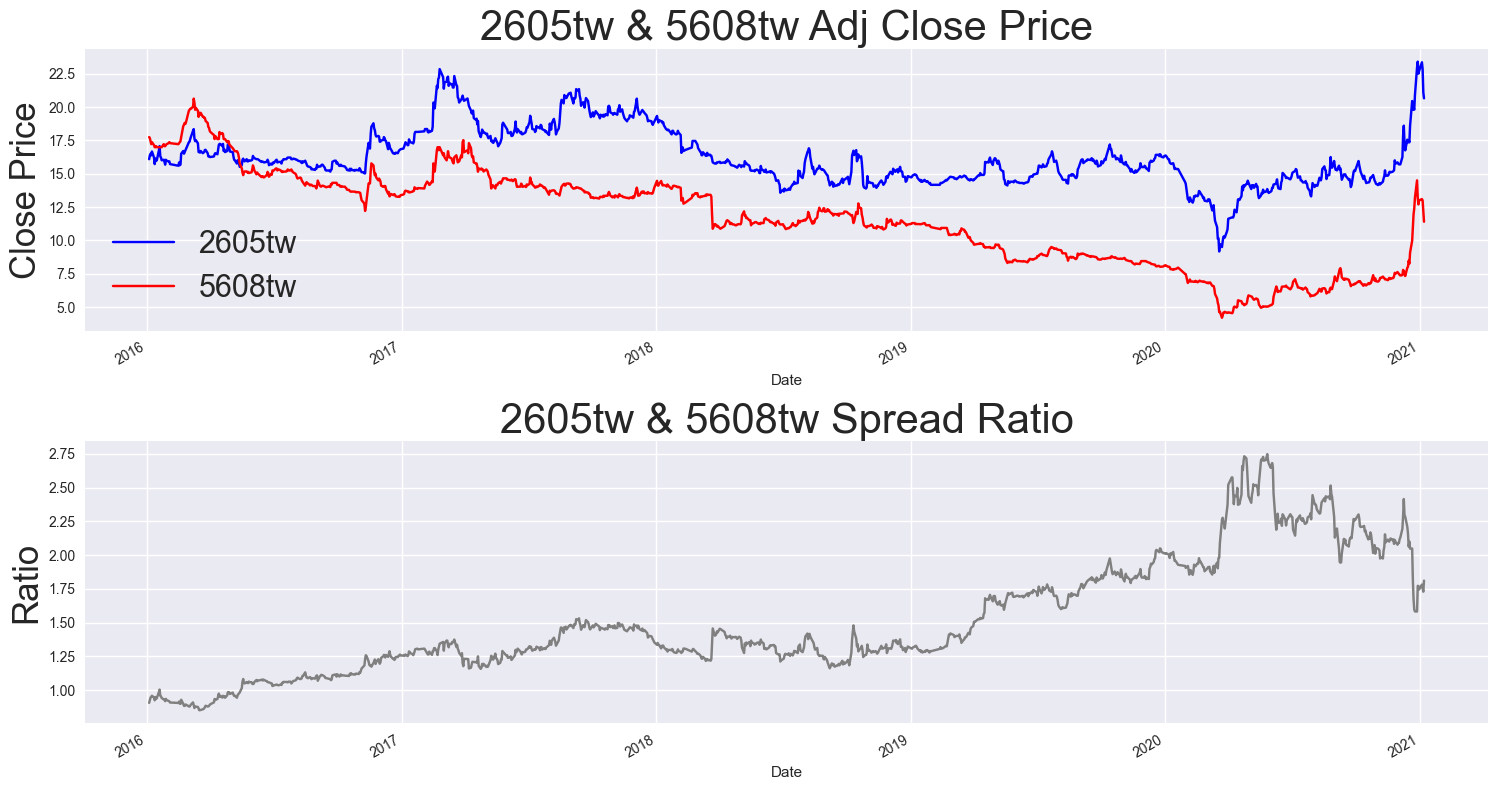

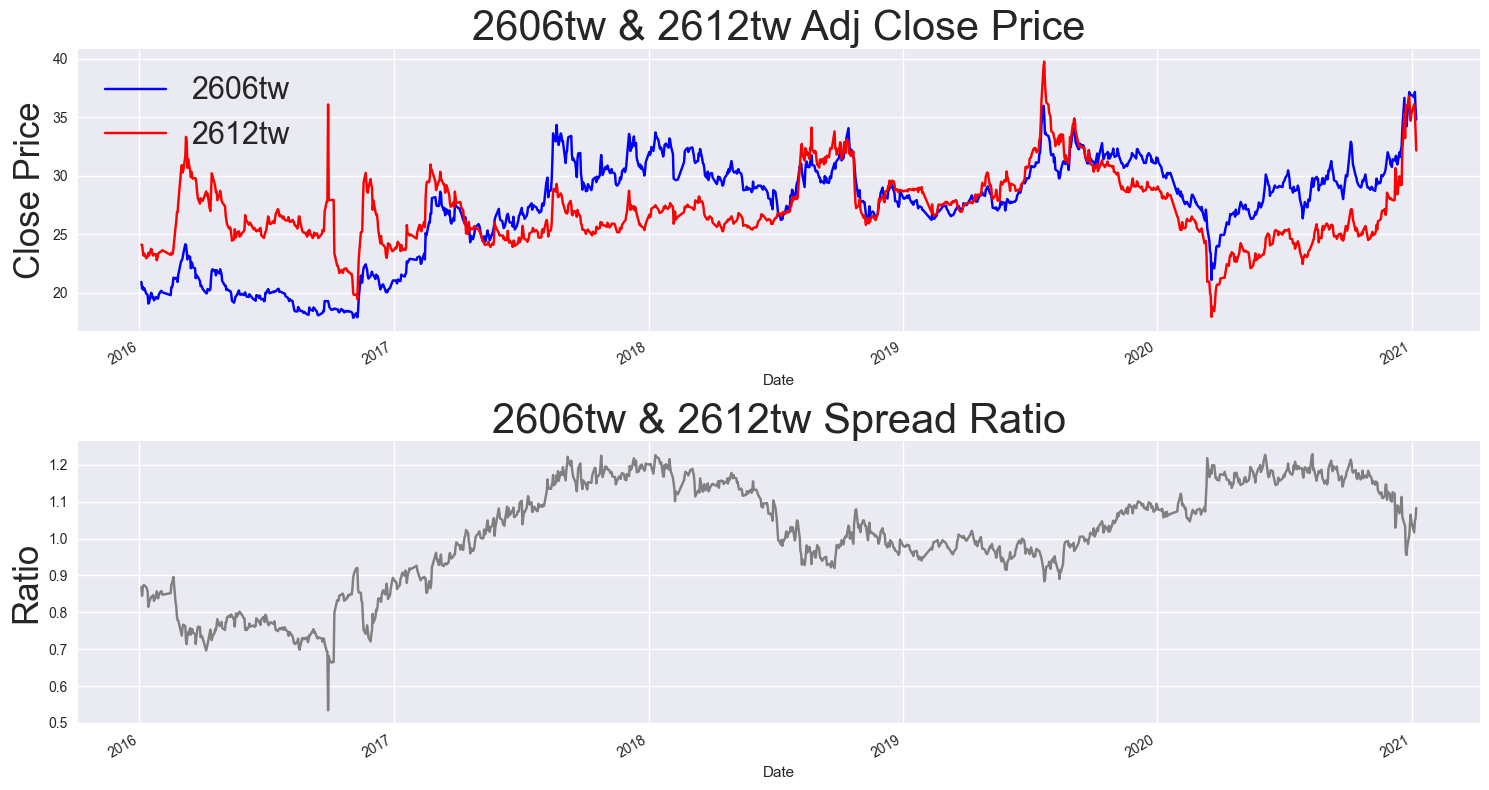

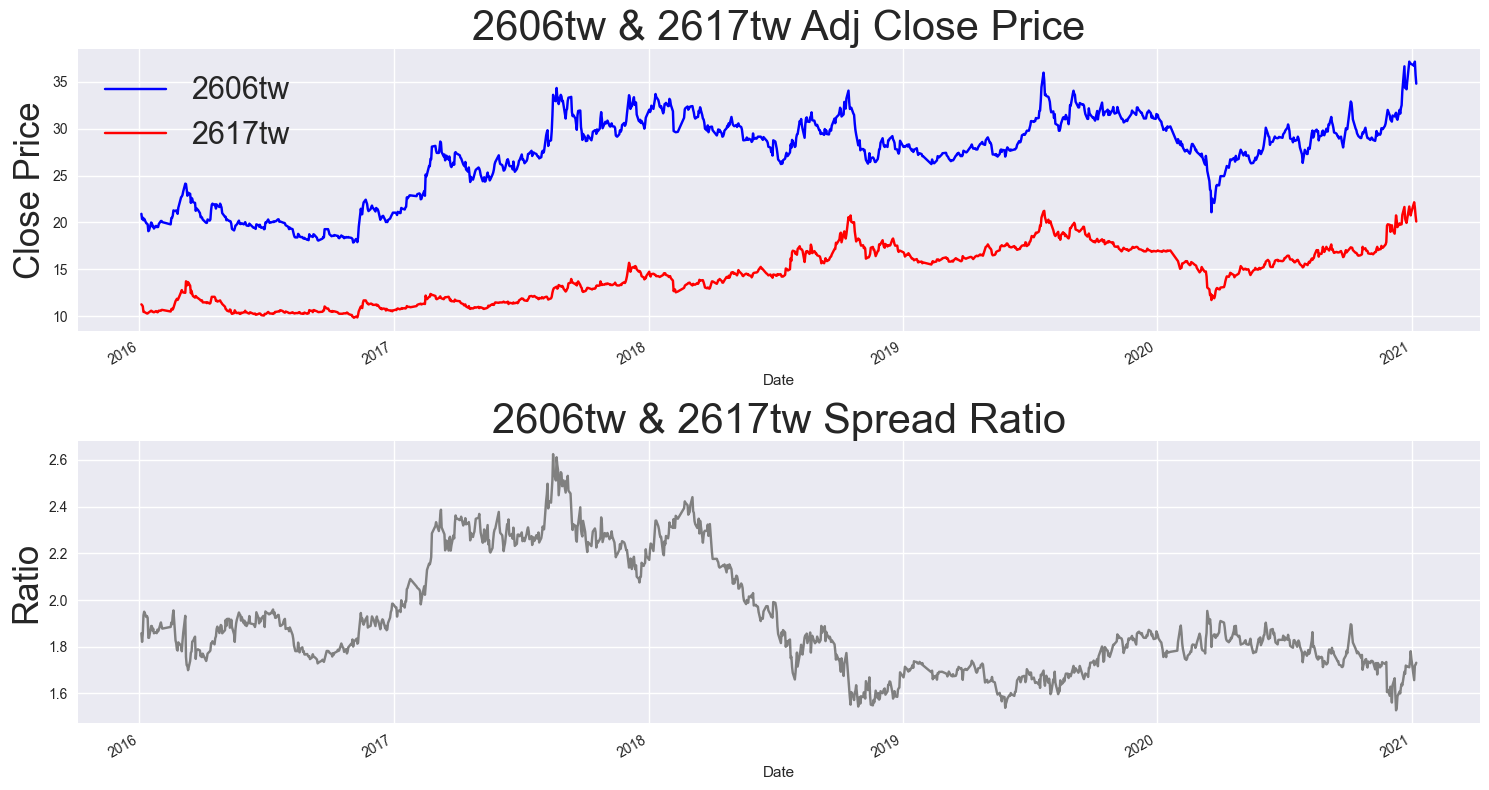

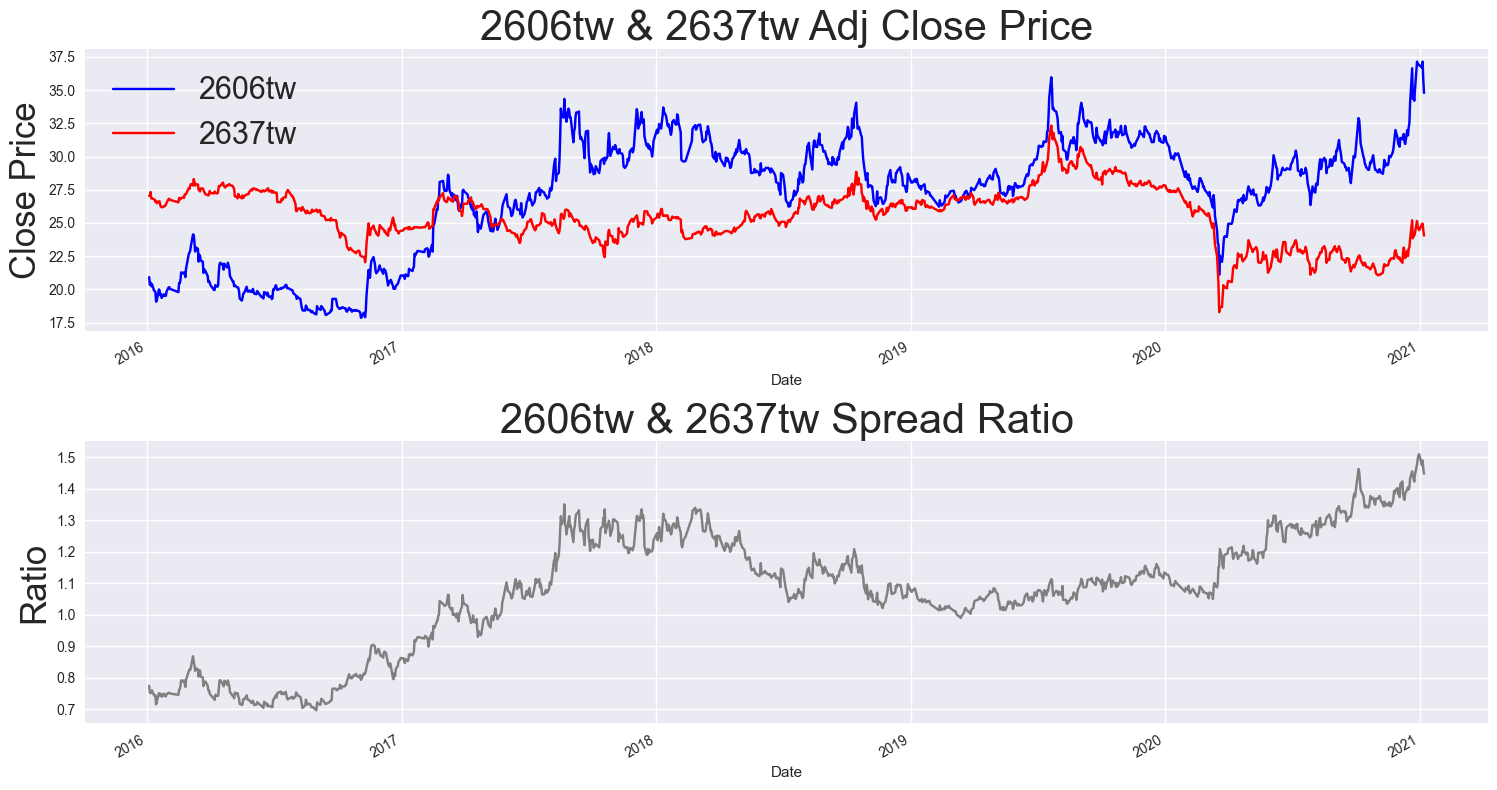

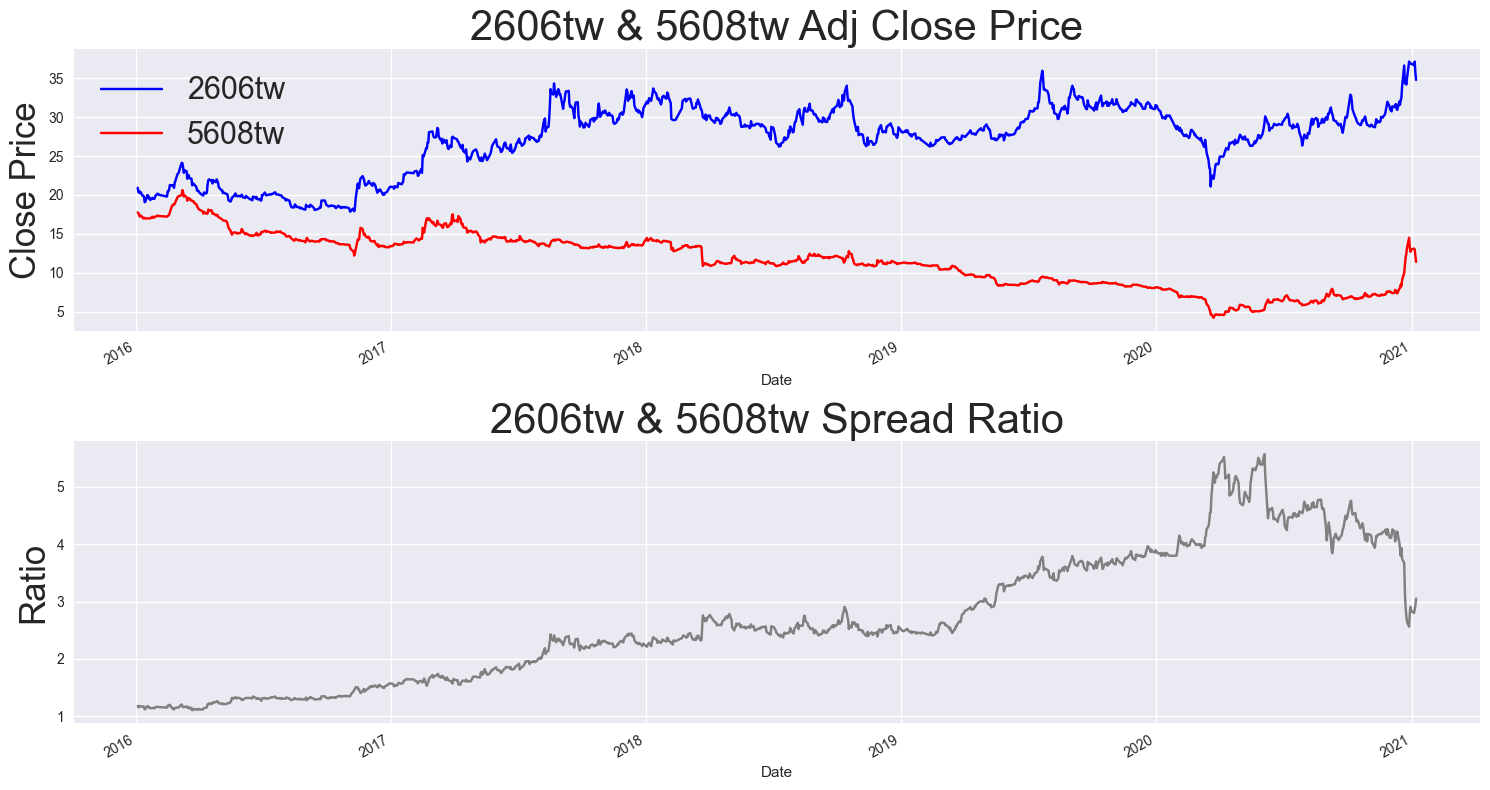

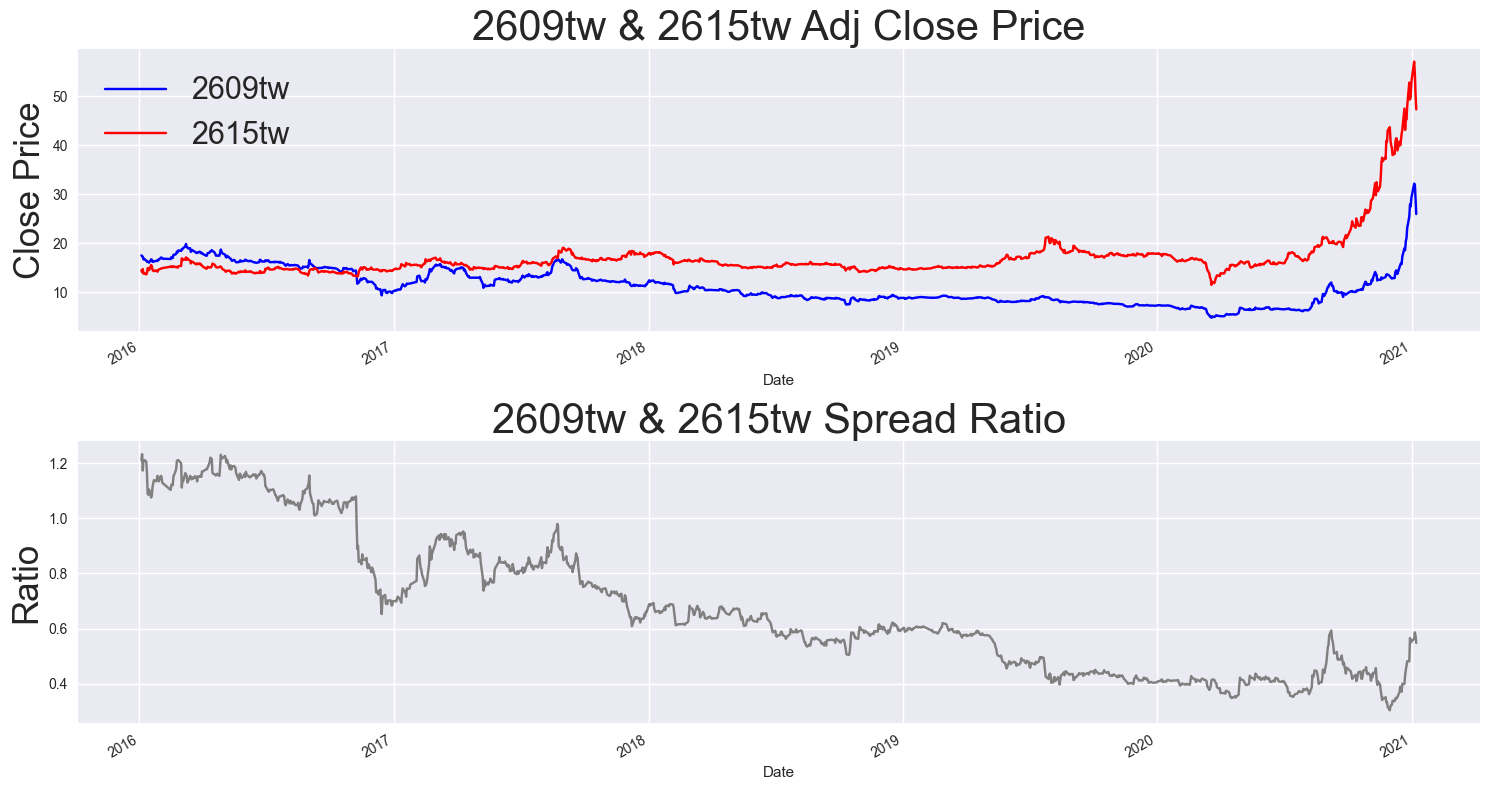

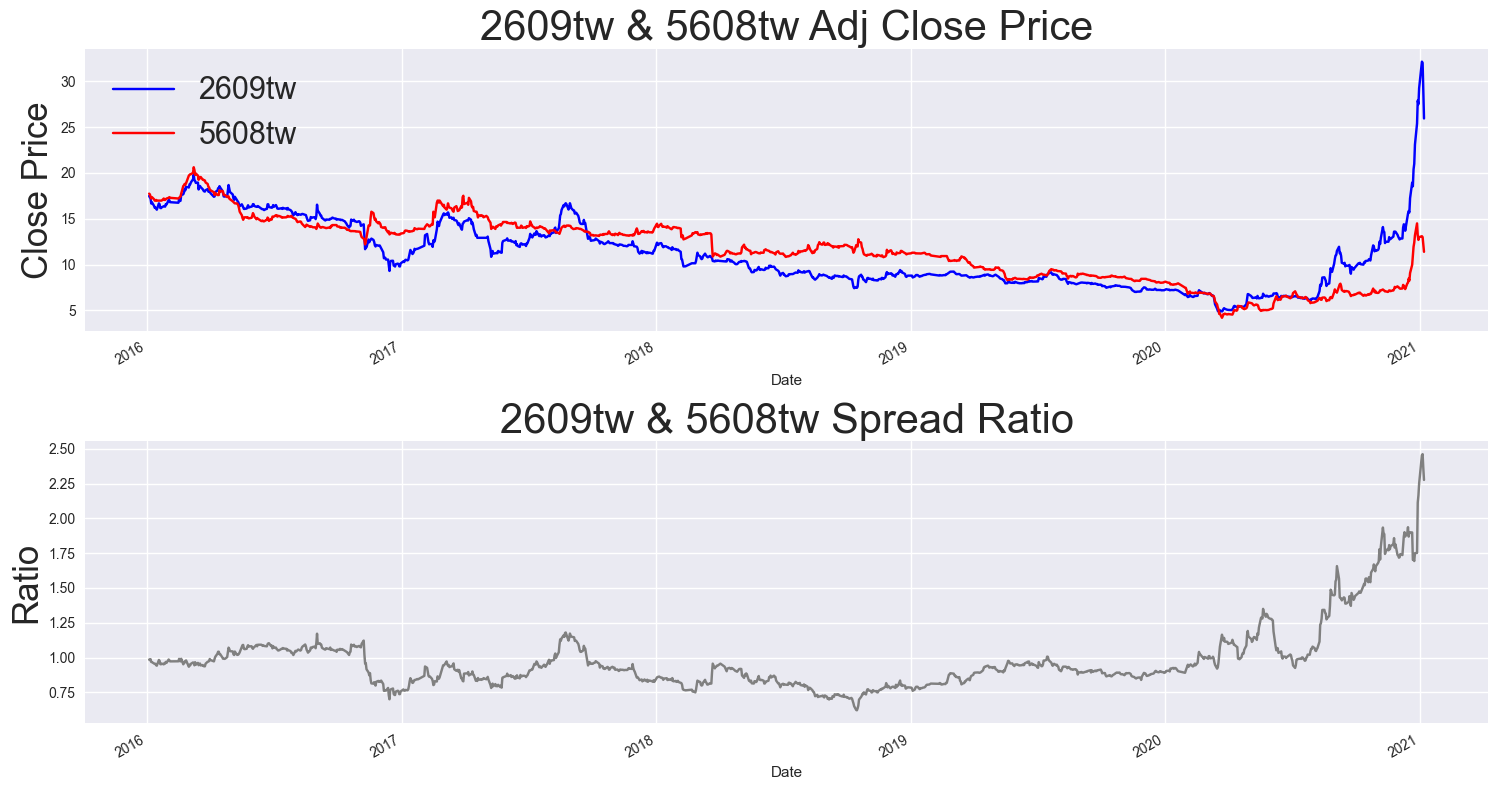

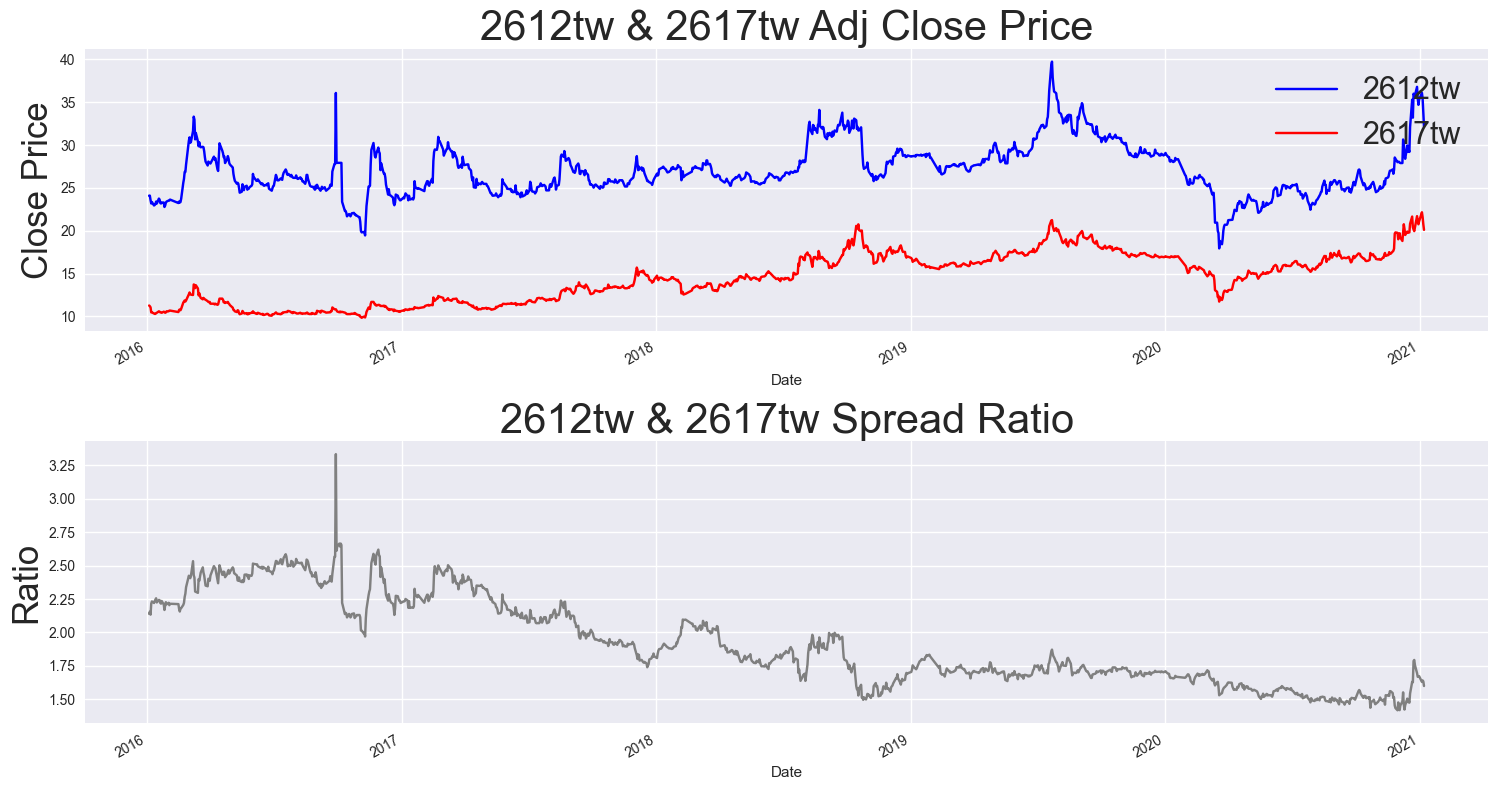

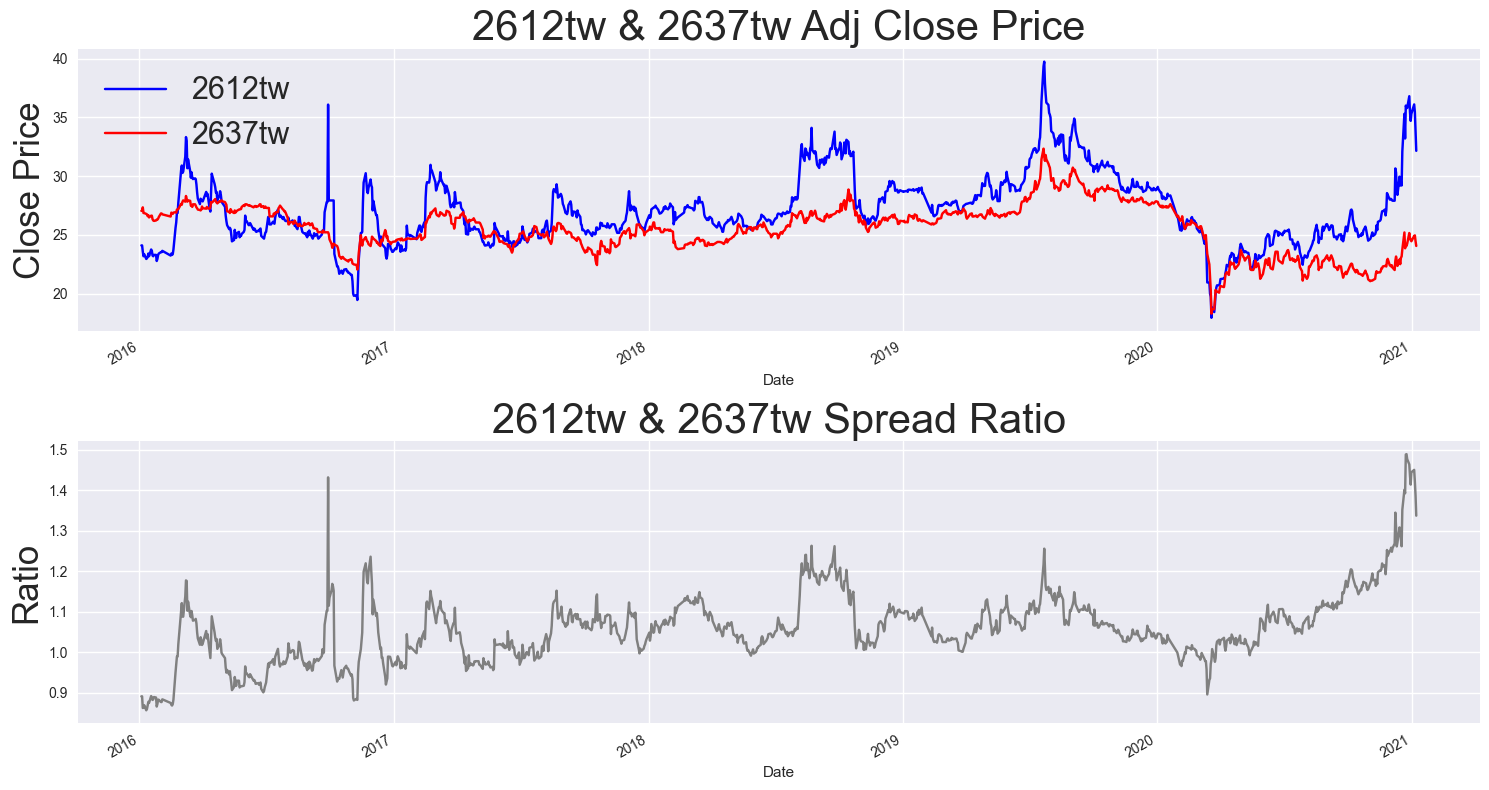

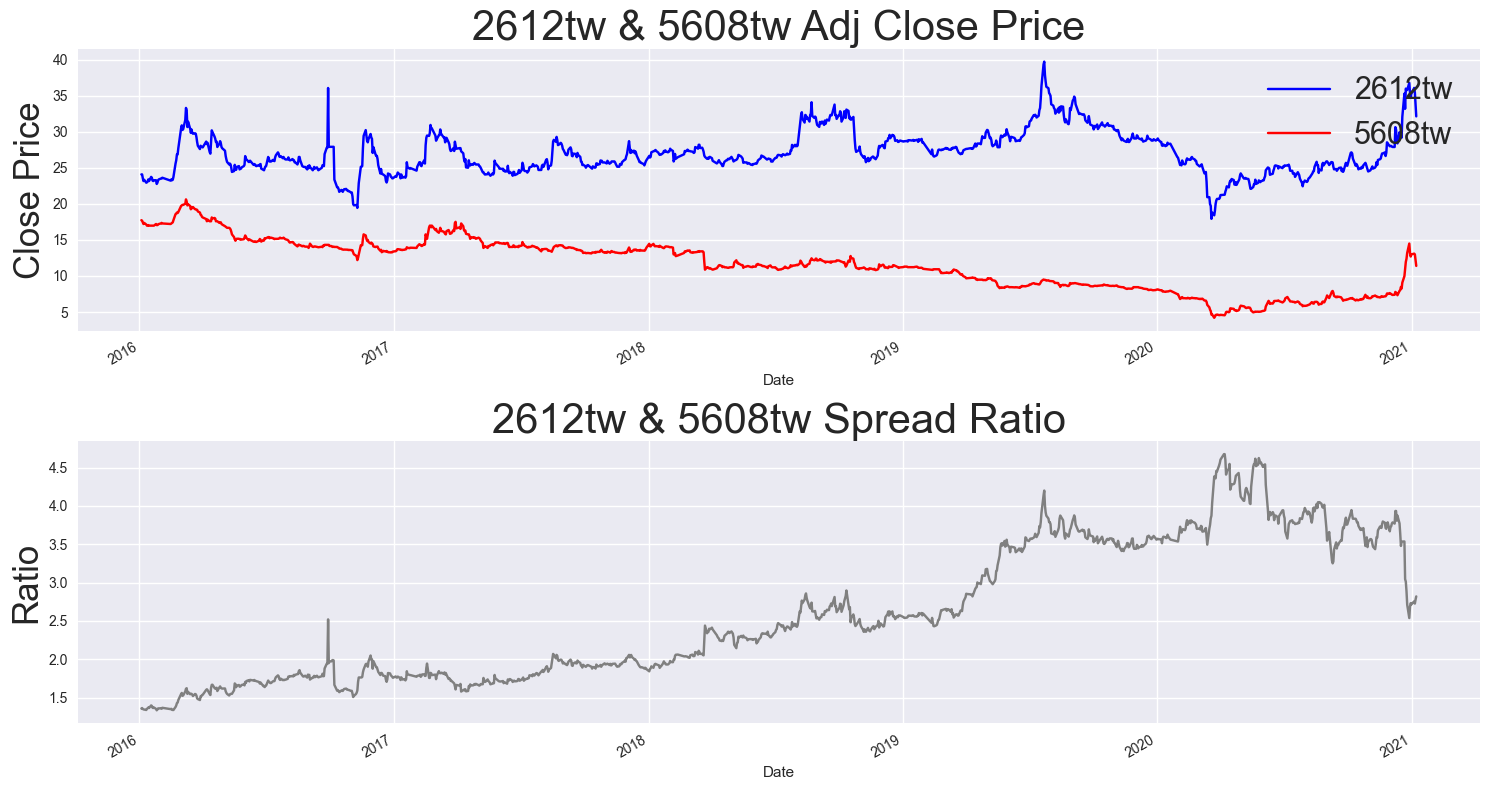

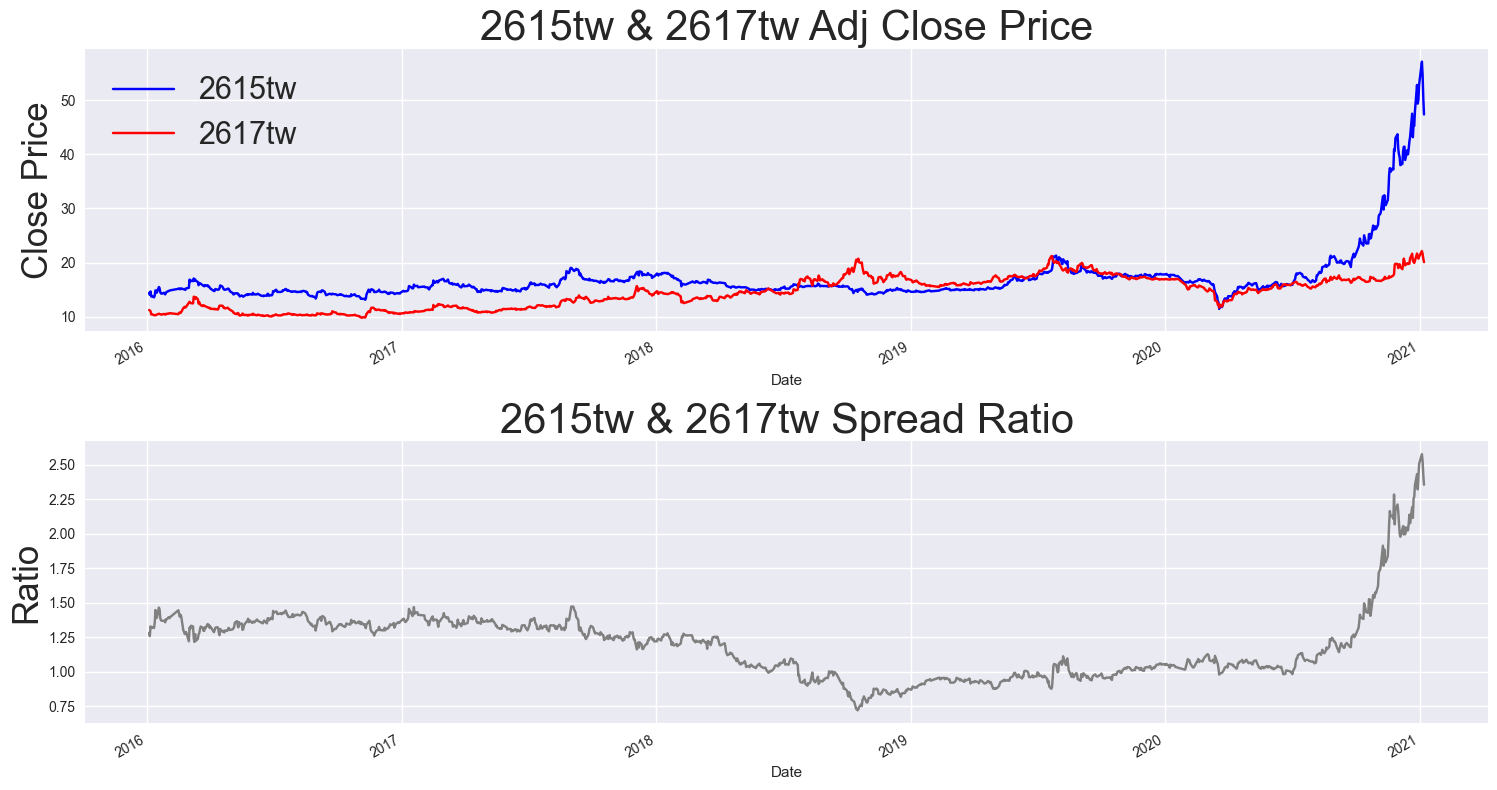

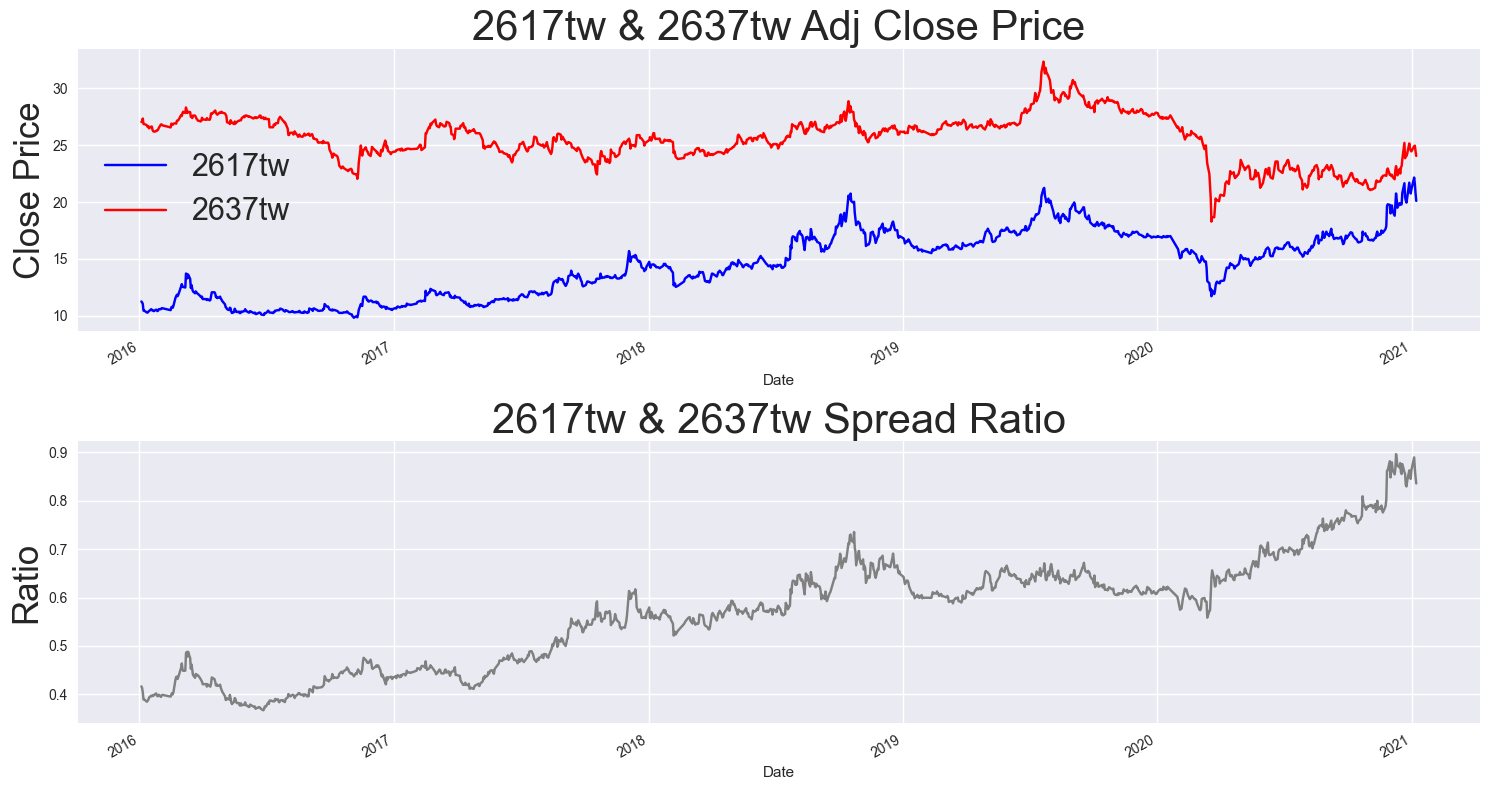

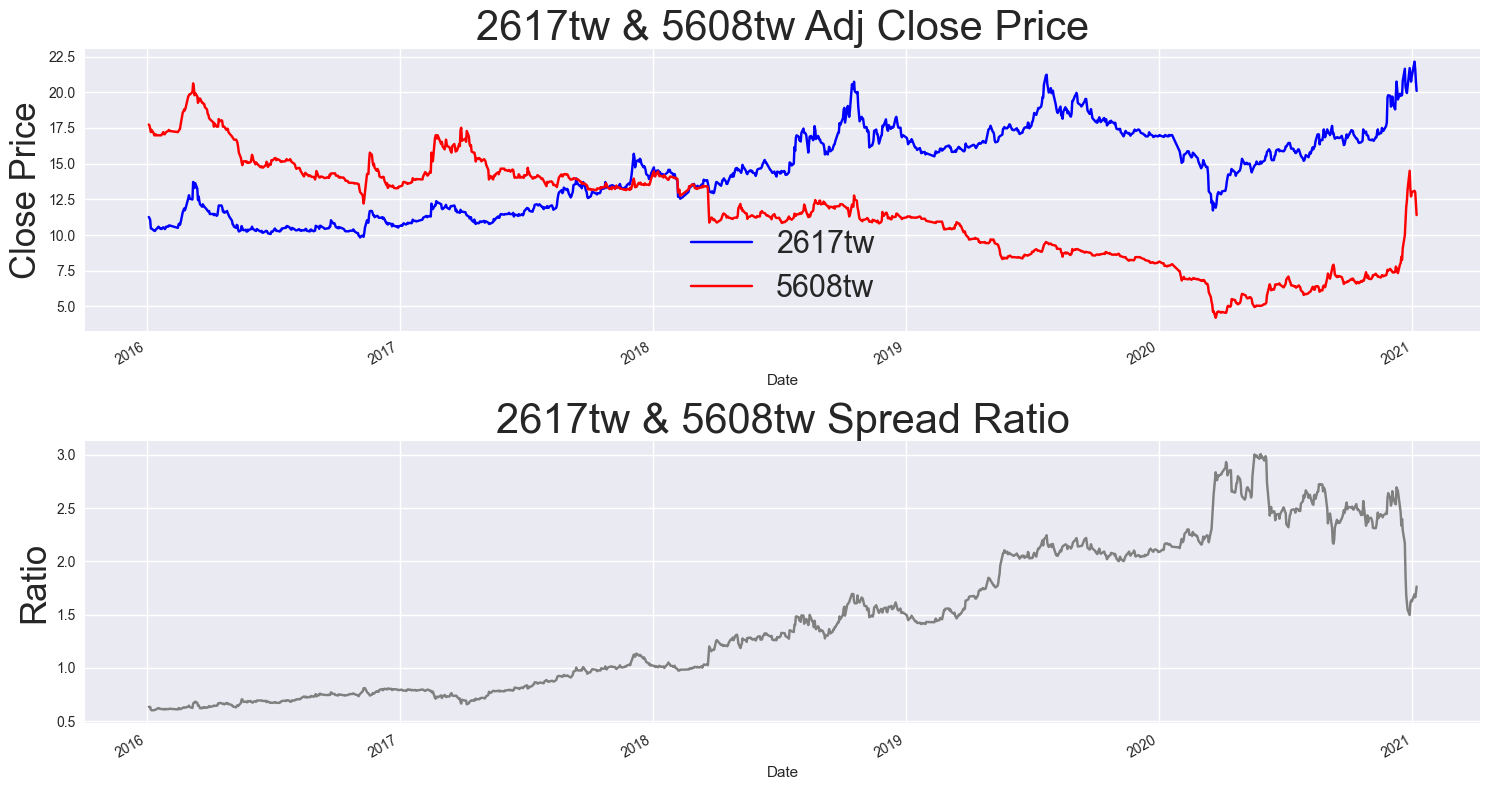

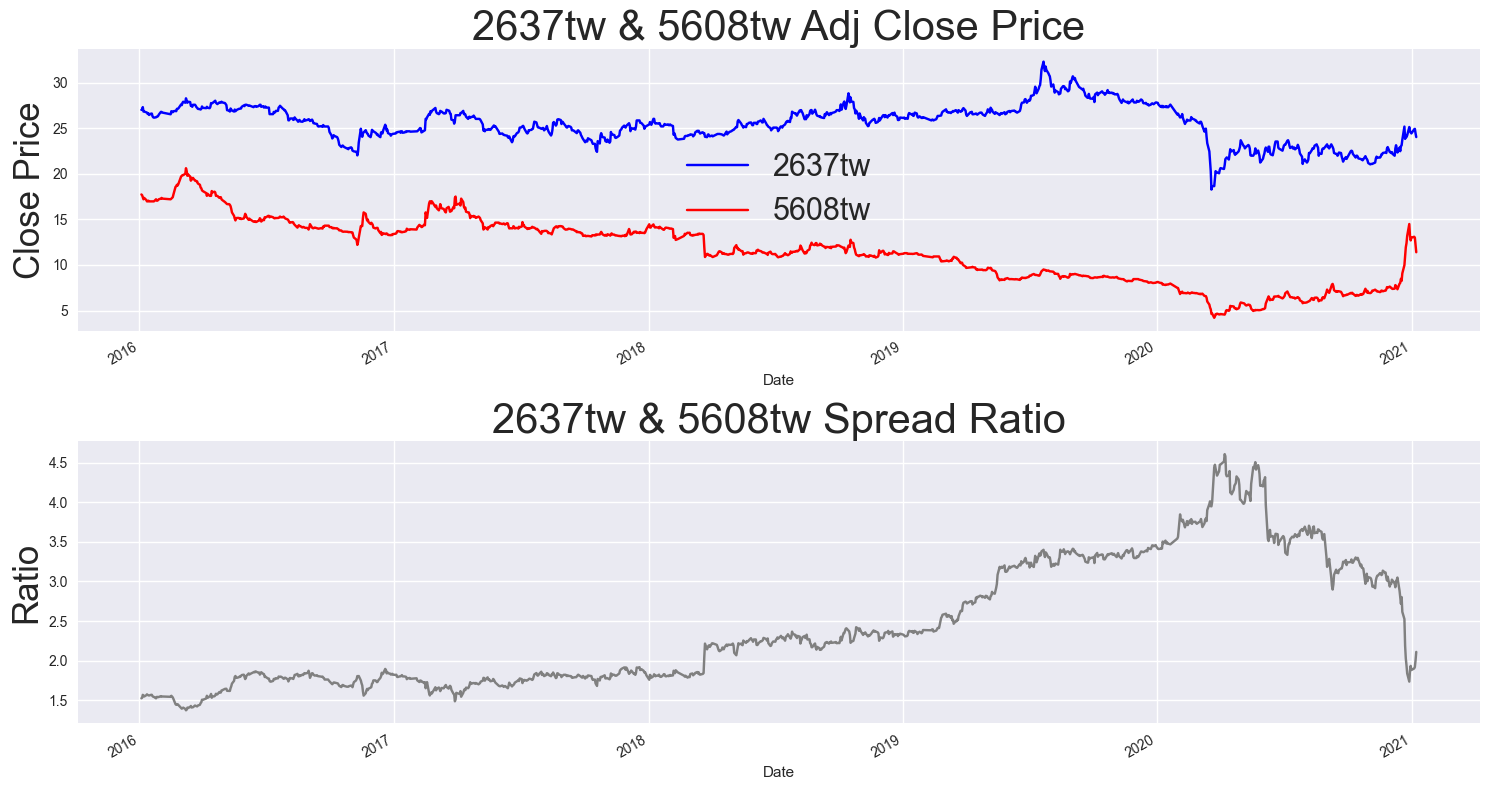

In [21]:
for key,value in pair_dict.items():
    
    plt.figure(figsize=(15,8),dpi=100)
    plt.subplot(2,1,1)
    ax=value[key[0]].plot(c='b')
    ax2=value[key[1]].plot(c='r')
    lines = ax.get_lines()
    plt.legend(lines, [l.get_label() for l in lines], fontsize=22)
    plt.ylabel('Close Price', fontsize=25)
    plt.title('{} & {} Adj Close Price'.format(key[0],key[1]),fontsize=30)
    
    plt.subplot(2,1,2)
    spread = value[key[0]]/value[key[1]]
    spread.plot(c='grey', label='spread')
    plt.title('{} & {} Spread Ratio'.format(key[0],key[1]),fontsize=30)
    plt.ylabel('Ratio', fontsize=25)
    plt.tight_layout()

# 先檢定價格序列是否為I(1)
### example: 長榮2603&萬海2615

In [22]:
from statsmodels.tsa.stattools import adfuller

In [23]:
# 先將所有的股票代號unique出來

tmp_unique_list = []
for key in pair_dict.keys():
    tmp_unique_list.append(key[0])
    tmp_unique_list.append(key[1])
    
unique_set = set(tmp_unique_list)
unique_set

{'2603tw',
 '2605tw',
 '2606tw',
 '2609tw',
 '2612tw',
 '2615tw',
 '2617tw',
 '2637tw',
 '5608tw'}

In [24]:
adf_res_dic = {}

for code in unique_set:
    adf_res_dic[code] = adfuller(
        close_df[code].pct_change(1).dropna()
    )

### 差分之後：定態

In [25]:
for key,value in adf_res_dic.items():
    test_result = pd.Series(
        value[0:4],
        index = [
            'Test Statistic(Dickey Fuller)',
            'p-value',
            'Lags Used',
            'Number of Observations Used'
        ]
    )
    print()
    print('------------- '+key+' test result -------------')
    for key,value in value[4].items():
        test_result['Critical Value({})'.format(key)] = value
    if test_result[1]<0.05:
        print(test_result)
    if test_result[1]>0.05:
        print(key,' The process contains a unit root.')


------------- 2606tw test result -------------
Test Statistic(Dickey Fuller)     -33.576988
p-value                             0.000000
Lags Used                           0.000000
Number of Observations Used      1220.000000
Critical Value(1%)                 -3.435721
Critical Value(5%)                 -2.863912
Critical Value(10%)                -2.568033
dtype: float64

------------- 2637tw test result -------------
Test Statistic(Dickey Fuller)     -31.705443
p-value                             0.000000
Lags Used                           0.000000
Number of Observations Used      1220.000000
Critical Value(1%)                 -3.435721
Critical Value(5%)                 -2.863912
Critical Value(10%)                -2.568033
dtype: float64

------------- 2603tw test result -------------
Test Statistic(Dickey Fuller)   -7.653174e+00
p-value                          1.767092e-11
Lags Used                        1.900000e+01
Number of Observations Used      1.201000e+03
Critical Val

### 一階差分後：定態

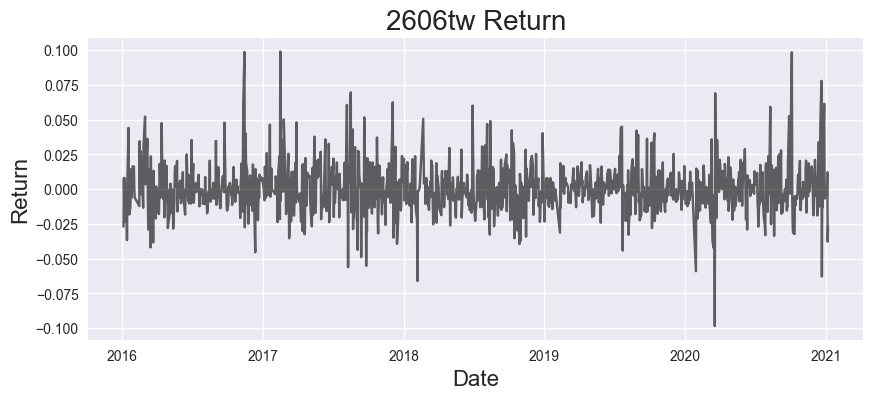

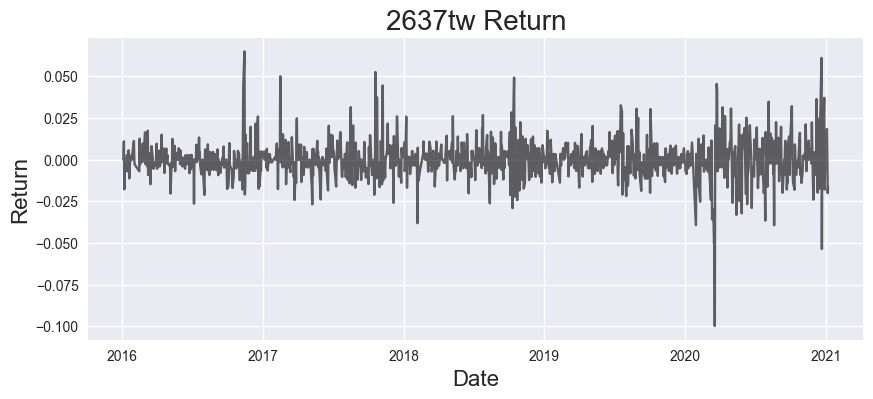

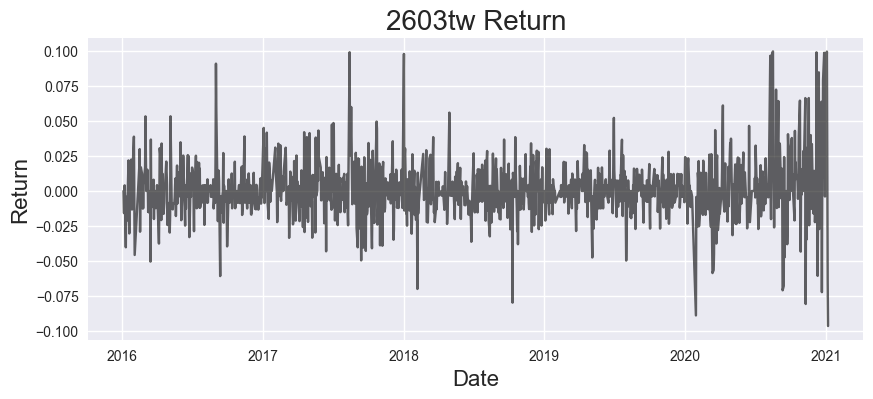

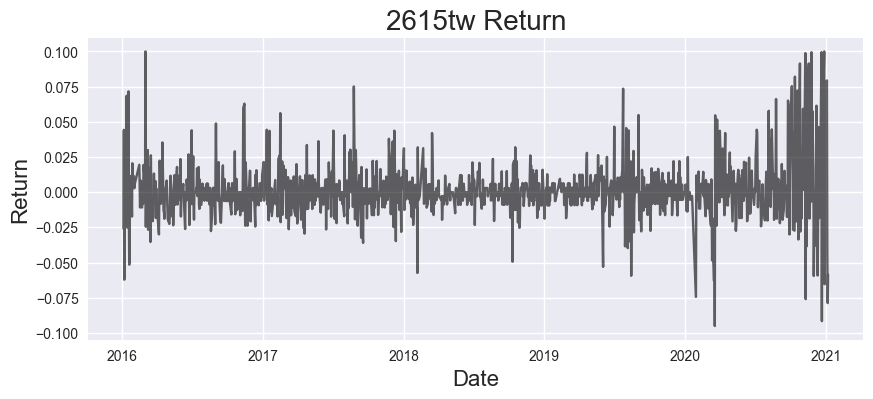

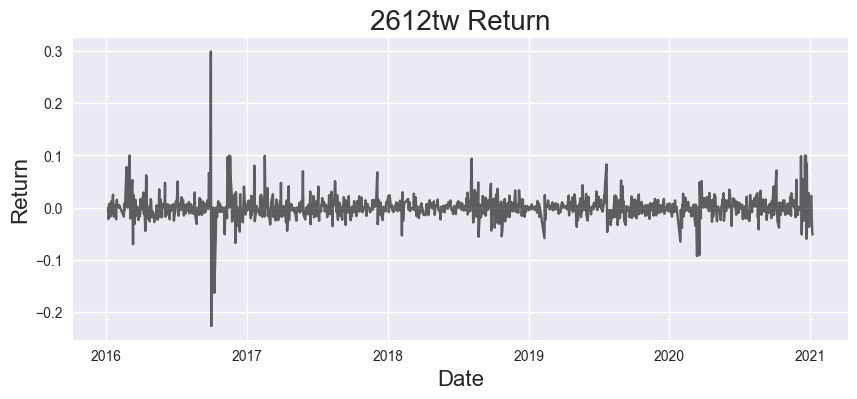

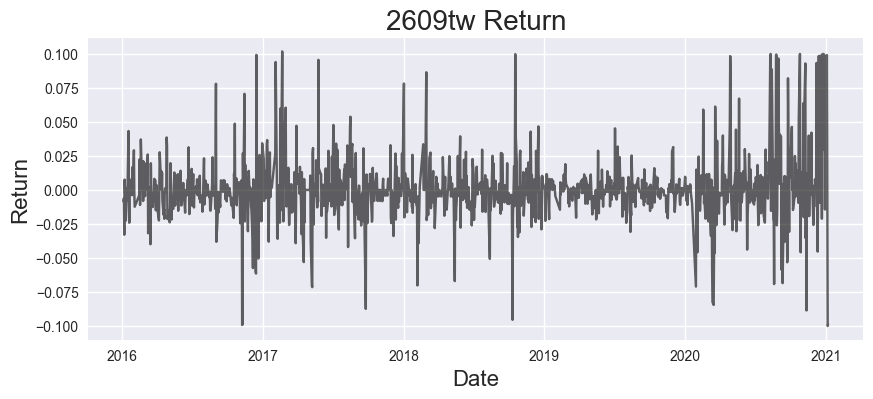

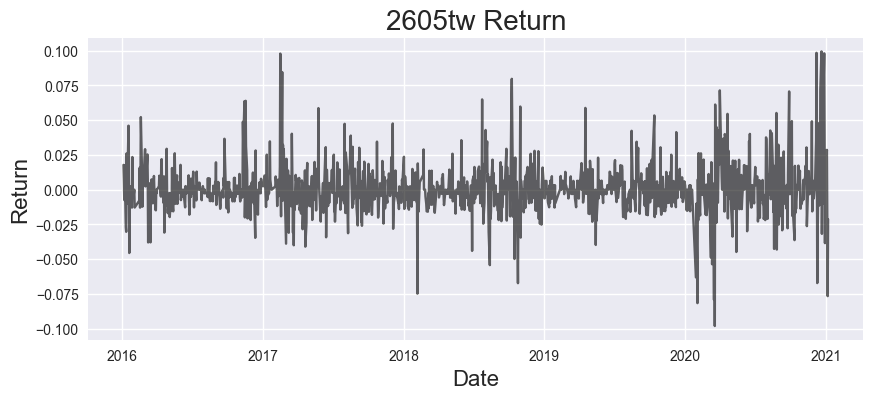

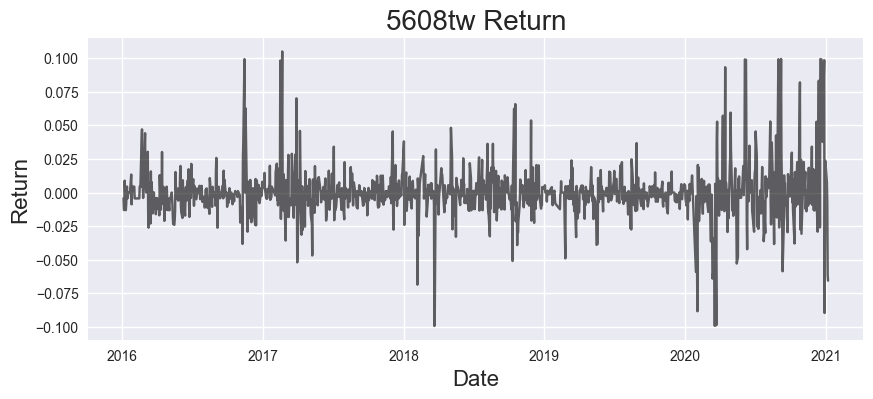

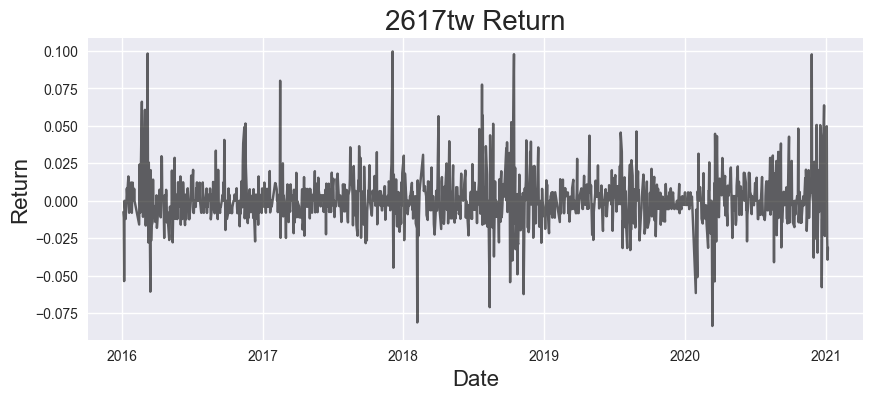

In [26]:
for code in unique_set:
    plt.figure(figsize=(10,4),dpi=100)
    plt.plot(
        close_df[code].pct_change(1),c='black',alpha=0.6
    )
    plt.title('{} Return'.format(code), fontsize=20)
    plt.xlabel('Date', fontsize=16)
    plt.ylabel('Return', fontsize=16)

/Users/yvette/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


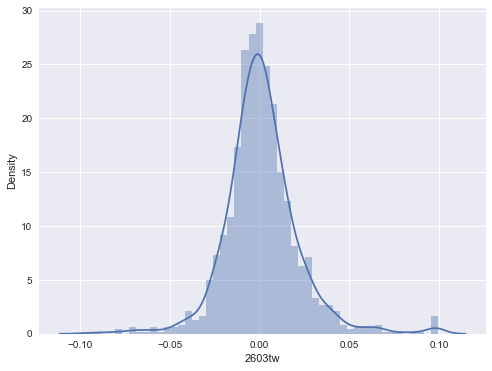

In [28]:
plt.figure(figsize=(8,6))
ax = sns.distplot(close_df['2603tw'].pct_change(1))

# Step2:透過迴歸模型fit出一條線 (OLS模型)
接著看其residual是否為I(0)，若是則代表共整合存在

code ref: https://towardsdatascience.com/total-least-squares-in-comparison-with-ols-and-odr-f050ffc1a86a

In [29]:
from scipy import odr
from statsmodels.tools.tools import add_constant
from statsmodels.regression.linear_model import OLS
from arch.unitroot import ADF

def f(B, x):
    '''Linear function y = m*x + b'''
    # B is a vector of the parameters.
    # x is an array of the current x values.
    # x is in the same format as the x passed to Data or RealData.
    # Return an array in the same format as y passed to Data or RealData.
    return B[0]*x + B[1]

In [30]:
linear = odr.Model(f)

# 取log
used_data = odr.Data(np.log(close_df['2603tw']),
                     np.log(close_df['2615tw']))

In [31]:
def run_regression(x, y):
    X = add_constant(x)
    Y = y
    model = OLS(Y, X, missing="drop")
    result = model.fit()
    return result

## 找出殘差為定態的配對 p-value<0.05

In [34]:
for key,value in pair_dict.items():
    model = run_regression(
        np.log(value[key[0]]),
        np.log(value[key[1]])
    )
    
    if ADF(model.resid, trend='nc').pvalue <0.05:
        print(key)

('2603tw', '2615tw')
('2605tw', '2609tw')
('2605tw', '2612tw')
('2605tw', '2637tw')
('2606tw', '2612tw')
('2606tw', '2637tw')
('2606tw', '5608tw')
('2612tw', '2637tw')
('2617tw', '2637tw')
('2617tw', '5608tw')


/Users/yvette/opt/anaconda3/lib/python3.8/site-packages/arch/unitroot/unitroot.py:464: FutureWarning: Trend "nc" is deprecated and has been replaced with "n" (for none).
  warnings.warn(
/Users/yvette/opt/anaconda3/lib/python3.8/site-packages/arch/unitroot/unitroot.py:464: FutureWarning: Trend "nc" is deprecated and has been replaced with "n" (for none).
  warnings.warn(
/Users/yvette/opt/anaconda3/lib/python3.8/site-packages/arch/unitroot/unitroot.py:464: FutureWarning: Trend "nc" is deprecated and has been replaced with "n" (for none).
  warnings.warn(
/Users/yvette/opt/anaconda3/lib/python3.8/site-packages/arch/unitroot/unitroot.py:464: FutureWarning: Trend "nc" is deprecated and has been replaced with "n" (for none).
  warnings.warn(
/Users/yvette/opt/anaconda3/lib/python3.8/site-packages/arch/unitroot/unitroot.py:464: FutureWarning: Trend "nc" is deprecated and has been replaced with "n" (for none).
  warnings.warn(
/Users/yvette/opt/anaconda3/lib/python3.8/site-packages/arch/unit

In [35]:
model_1 = run_regression(np.log(close_df['2603tw']),
                         np.log(close_df['2615tw']))
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 2615tw   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     3001.
Date:                Wed, 13 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:12:21   Log-Likelihood:                 937.21
No. Observations:                1222   AIC:                            -1870.
Df Residuals:                    1220   BIC:                            -1860.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6920      0.039     17.841      0.0

In [36]:
# residual定態(殘差均值為0將trend設為nc)
ADF(model_1.resid, trend='nc')

/Users/yvette/opt/anaconda3/lib/python3.8/site-packages/arch/unitroot/unitroot.py:464: FutureWarning: Trend "nc" is deprecated and has been replaced with "n" (for none).
  warnings.warn(


<class 'arch.unitroot.unitroot.ADF'>
"""
   Augmented Dickey-Fuller Results   
=====================================
Test Statistic                 -2.560
P-value                         0.010
Lags                                0
-------------------------------------

Trend: No Trend
Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
"""

In [37]:
model_2 = run_regression(np.log(close_df['2615tw']),
                         np.log(close_df['2603tw']))
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                 2603tw   R-squared:                       0.711
Model:                            OLS   Adj. R-squared:                  0.711
Method:                 Least Squares   F-statistic:                     3001.
Date:                Wed, 13 Jan 2021   Prob (F-statistic):               0.00
Time:                        21:12:21   Log-Likelihood:                 910.26
No. Observations:                1222   AIC:                            -1817.
Df Residuals:                    1220   BIC:                            -1806.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1455      0.044      3.282      0.0

In [38]:
ADF(model_2.resid, trend='nc')

/Users/yvette/opt/anaconda3/lib/python3.8/site-packages/arch/unitroot/unitroot.py:464: FutureWarning: Trend "nc" is deprecated and has been replaced with "n" (for none).
  warnings.warn(


<class 'arch.unitroot.unitroot.ADF'>
"""
   Augmented Dickey-Fuller Results   
=====================================
Test Statistic                 -2.547
P-value                         0.011
Lags                                0
-------------------------------------

Trend: No Trend
Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
"""

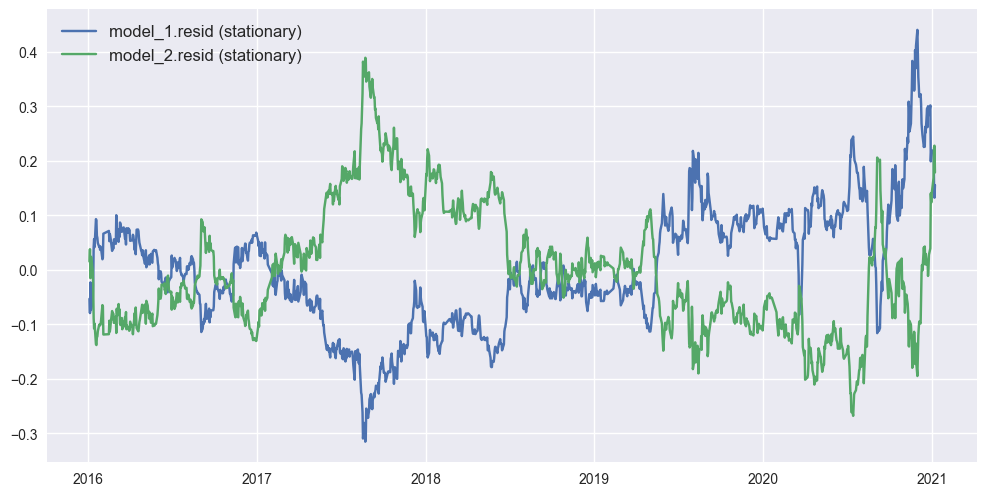

In [39]:
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(model_1.resid, label="model_1.resid (stationary)")
plt.plot(model_2.resid, label="model_2.resid (stationary)")
plt.title('')
plt.legend(fontsize=12);

# ODR模型（文獻推薦）

In [40]:
import scipy.odr as odr

def odr_line(B, x):
    y = B[0]*x + B[1]*x**2
    return y

def perform_odr(x, y, xerr, yerr):
    quadr = odr.Model(odr_line)
    mydata = odr.Data(x, y, wd=1./xerr, we=1./yerr)
    #mydata = odr.Data(x, y)
    myodr = odr.ODR(mydata, quadr, beta0=[0., 0.])
    output = myodr.run()
    return output

In [41]:
linear = odr.Model(odr_line)

used_data = odr.Data(np.log(close_df['2615tw']),
                     np.log(close_df['2603tw']))

odr_model_1 = odr.ODR(used_data, linear, beta0=[1., 2.])

result_1 = odr_model_1.run()

result_1.pprint()

Beta: [0.84258293 0.02525945]
Beta Std Error: [0.01429515 0.00501818]
Beta Covariance: [[ 0.0286942  -0.01003706]
 [-0.01003706  0.00353598]]
Residual Variance: 0.007121694868817305
Inverse Condition #: 0.022366480577183875
Reason(s) for Halting:
  Sum of squares convergence


In [42]:
used_data = odr.Data(np.log(close_df['2603tw']),
                     np.log(close_df['2615tw']))

odr_model_2 = odr.ODR(used_data, linear, beta0=[1., 2.])

result_2 = odr_model_2.run()

result_2.pprint()

Beta: [ 1.16340941 -0.02681268]
Beta Std Error: [0.0140006  0.00534765]
Beta Covariance: [[ 0.0274683  -0.01044338]
 [-0.01044338  0.00400741]]
Residual Variance: 0.007136114317776256
Inverse Condition #: 0.027226658121545958
Reason(s) for Halting:
  Sum of squares convergence


In [43]:
resid_1 =(
    np.log(close_df['2603tw']) -
    result_1.beta[1] -
    result_1.beta[0]*np.log(close_df['2615tw'])
)

In [44]:
ADF(resid_1, trend="nc")

/Users/yvette/opt/anaconda3/lib/python3.8/site-packages/arch/unitroot/unitroot.py:464: FutureWarning: Trend "nc" is deprecated and has been replaced with "n" (for none).
  warnings.warn(


<class 'arch.unitroot.unitroot.ADF'>
"""
   Augmented Dickey-Fuller Results   
=====================================
Test Statistic                 -1.110
P-value                         0.242
Lags                                0
-------------------------------------

Trend: No Trend
Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
"""

In [45]:
resid_2 =(
    np.log(close_df['2615tw']) -
    result_2.beta[1] -
    result_2.beta[0]*np.log(close_df['2603tw'])
)

In [46]:
ADF(resid_2, trend="nc")

/Users/yvette/opt/anaconda3/lib/python3.8/site-packages/arch/unitroot/unitroot.py:464: FutureWarning: Trend "nc" is deprecated and has been replaced with "n" (for none).
  warnings.warn(


<class 'arch.unitroot.unitroot.ADF'>
"""
   Augmented Dickey-Fuller Results   
=====================================
Test Statistic                 -1.486
P-value                         0.128
Lags                                0
-------------------------------------

Trend: No Trend
Critical Values: -2.57 (1%), -1.94 (5%), -1.62 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
"""

In [47]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [48]:
tmp_pair = close_df[['2603tw', '2615tw']]

# 建立交易訊號

In [49]:
def BollingerBand_plt(df, stock_1, stock_2, window, std):
    price_1 = df[stock_1]
    price_2 = df[stock_2]

    Spread_ratio = price_1 / price_2     
    Spread_ratio_mean = Spread_ratio.rolling(window = window).mean()
    Spread_ratio_std = Spread_ratio.rolling(window = window).std()
    upper_bond = Spread_ratio_mean + std * Spread_ratio_std
    lower_bond = Spread_ratio_mean - std * Spread_ratio_std
    datetime = df.index
    
    plt.figure(figsize=(16,8))
    plt.title('Bollinger Band Spread Ratio',fontsize=20)
    ax = Spread_ratio.plot(label='Ratio', c='b')
    Spread_ratio_mean_line = pd.Series(Spread_ratio_mean,index=datetime)
    Spread_ratio_up_line = pd.Series(upper_bond,index=datetime)
    Spread_ratio_down_line = pd.Series(lower_bond,index=datetime)
    Spread_ratio_mean_line.plot(label='mean',c='black')
    Spread_ratio_down_line.plot(label='lower bound',ls='--',alpha=0.8,c='grey')
    Spread_ratio_up_line.plot(label='upper bound',ls='--',alpha=0.8,c='grey')
    plt.ylabel('Ratio', fontsize=15)
    plt.xlabel('Date', fontsize=15)
    plt.tight_layout()

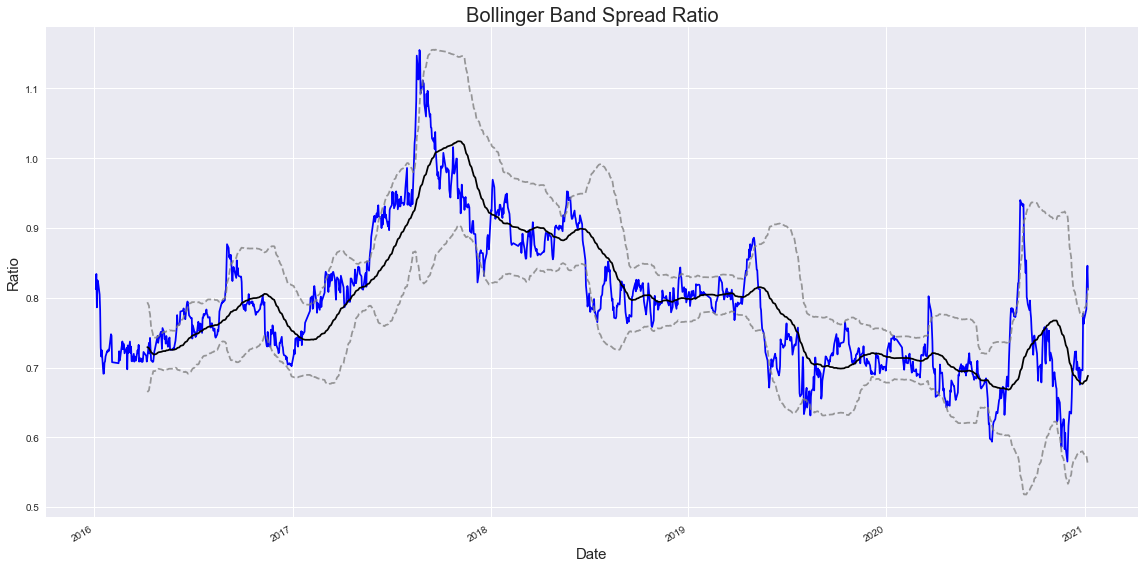

In [50]:
BollingerBand_plt(tmp_pair,'2603tw','2615tw',60,2)

In [342]:
pairs_df = close_df[['2603tw', '2615tw']]
pairs_df.columns = ['2603', '2615']
stock_1 = '2603'
stock_2 = '2615'

In [343]:
Spread_ratio = pairs_df[stock_1] / pairs_df[stock_2]     
Spread_ratio_mean = Spread_ratio.rolling(window = 10).mean()
Spread_ratio_std = Spread_ratio.rolling(window = 10).std()
upper_bond = Spread_ratio_mean + 2 * Spread_ratio_std
lower_bond = Spread_ratio_mean - 2 * Spread_ratio_std

## 回測步驟
### 1.建立交易訊號

* signal_list 當條件成立時append-1,1

### 2.計算部位

* 當上一期的訊號等於1 or -1且未達到翻單訊號(or平倉條件)時

* 令當期部位也等於1 or -1

### 3.計算損益

* 建立持有股數去計算損益

* 當本期的部位等於1 or -1且上一期不等於本期倉位時計算本日交易股數 用wealth/2去計算

* 當上一期與本期持有相同部位時持續等於交易股數

* 當上一期與本期持有不同部位時停止紀錄or翻單

In [344]:
upper_bond.shift(1)

Date
2016-01-04         NaN
2016-01-05         NaN
2016-01-06         NaN
2016-01-07         NaN
2016-01-08         NaN
                ...   
2020-12-31    0.775987
2021-01-04    0.792667
2021-01-05    0.811035
2021-01-06    0.845238
2021-01-07    0.875444
Length: 1222, dtype: float64

In [345]:
Spread_ratio.shift(1)

Date
2016-01-04         NaN
2016-01-05    0.812540
2016-01-06    0.834112
2016-01-07    0.786287
2016-01-08    0.825083
                ...   
2020-12-31    0.762475
2021-01-04    0.769376
2021-01-05    0.783713
2021-01-06    0.833333
2021-01-07    0.845924
Length: 1222, dtype: float64

In [346]:
# 建立交易訊號
signal_list = []

# spreadratio = stock_1 / stock_2
# short_condtition = short stock_1 (spreadratio>upper bond)
# long_condition = long stock_1

signal=[]

for i in range(len(pairs_df)):
    if Spread_ratio.shift(1).iloc[i]<upper_bond.shift(1).iloc[i] and Spread_ratio.iloc[i]>upper_bond.iloc[i]:
        short_condition = 1
        signal.append(short_condition)
    elif Spread_ratio.shift(1).iloc[i]>lower_bond.shift(1).iloc[i] and Spread_ratio.iloc[i]<lower_bond.iloc[i]:
        long_condition = -1
        signal.append(long_condition)
    else:
        short_condition = np.nan
        long_condition = np.nan
        signal.append(np.nan)

In [347]:
# 確認交易訊號有打到
Spread_ratio.shift(1).iloc[-3]<upper_bond.shift(1).iloc[-3] and Spread_ratio.iloc[-3]>upper_bond.iloc[-3]

False

In [348]:
signal_df=pd.Series(signal,index=Spread_ratio.index)
signal_df

Date
2016-01-04   NaN
2016-01-05   NaN
2016-01-06   NaN
2016-01-07   NaN
2016-01-08   NaN
              ..
2020-12-31   NaN
2021-01-04   NaN
2021-01-05   NaN
2021-01-06   NaN
2021-01-07   NaN
Length: 1222, dtype: float64

In [418]:
count_number = 0

for i in range(len(signal_df)):
    if signal_df.iloc[i] == 1:
        count_number += 1
    elif signal_df.iloc[i] == -1:
        count_number += 1

In [419]:
count_number

67

In [349]:
position_df = signal_df.shift(1)

In [350]:
for i in range(1,len(signal_df)):
    if position_df.iloc[i-1]==1 and position_df.iloc[i]!=-1:
        position_df.iloc[i] = 1
    elif position_df.iloc[i-1]==-1 and position_df.iloc[i]!=1:
        position_df.iloc[i] = -1
    # else: position_df.iloc[i] = 0

In [351]:
wealth = 1000000

stock1_entry = signal_df*(wealth/2/pairs_df[stock_1].shift(1))
stock2_entry = -signal_df*(wealth/2/pairs_df[stock_2].shift(1))
pairs_entry_df = pd.concat([stock1_entry,stock2_entry],axis=1,keys=[stock_1,stock_2])

In [352]:
stock1_number = []
stock2_number = []
for i in range(1,len(pairs_entry_df)):
    if position_df.iloc[i]==1 and position_df.iloc[i-1]!=1:
        stock1_number = -signal_df*(wealth/2/pairs_df[stock_1].shift(1))
        stock2_number = signal_df*(wealth/2/pairs_df[stock_2].shift(1))
    elif position_df.iloc[i]==-1 and position_df.iloc[i-1]!=-1:
        stock1_number = signal_df*(wealth/2/pairs_df[stock_1].shift(1))
        stock2_number = -signal_df*(wealth/2/pairs_df[stock_2].shift(1))

In [353]:
stock1_entry = -signal_df*(wealth/2/pairs_df[stock_1].shift(1))
stock2_entry = signal_df*(wealth/2/pairs_df[stock_1].shift(1))
pairs_entry_df = pd.concat([stock1_entry,stock2_entry],axis=1,keys=[stock_1,stock_2])
pairs_entry_df.shift(1).iloc[65:80]

2603  2615
Date                  
2016-04-18   NaN   NaN
2016-04-19   NaN   NaN
2016-04-20   NaN   NaN
2016-04-21   NaN   NaN
2016-04-22   NaN   NaN
2016-04-25   NaN   NaN
2016-04-26   NaN   NaN
2016-04-27   NaN   NaN
2016-04-28   NaN   NaN
2016-04-29   NaN   NaN
2016-05-03   NaN   NaN
2016-05-04   NaN   NaN
2016-05-05   NaN   NaN
2016-05-06   NaN   NaN
2016-05-09   NaN   NaN

In [354]:
pairs_entry_df['{}'.format(stock_1)].fillna(method='ffill', inplace=True)
pairs_entry_df['{}'.format(stock_2)].fillna(method='ffill', inplace=True)
share_holding_df = pairs_entry_df.fillna(value=0) #持有股數
share_holding_df = share_holding_df.shift(1)
signal_df = signal_df.fillna(value=0)
position_df = position_df.fillna(value=0)

In [355]:
pd.concat([share_holding_df,signal_df,position_df],axis=1).iloc[65:80]

2603          2615    0    1
Date                                            
2016-04-18 -46250.488605  46250.488605  0.0  1.0
2016-04-19 -46250.488605  46250.488605  0.0  1.0
2016-04-20 -46250.488605  46250.488605  0.0  1.0
2016-04-21 -46250.488605  46250.488605  0.0  1.0
2016-04-22 -46250.488605  46250.488605  0.0  1.0
2016-04-25 -46250.488605  46250.488605  0.0  1.0
2016-04-26 -46250.488605  46250.488605  0.0  1.0
2016-04-27 -46250.488605  46250.488605  0.0  1.0
2016-04-28 -46250.488605  46250.488605  0.0  1.0
2016-04-29 -46250.488605  46250.488605  0.0  1.0
2016-05-03 -46250.488605  46250.488605  0.0  1.0
2016-05-04 -46250.488605  46250.488605  0.0  1.0
2016-05-05 -46250.488605  46250.488605  0.0  1.0
2016-05-06 -46250.488605  46250.488605  0.0  1.0
2016-05-09 -46250.488605  46250.488605  0.0  1.0

## 計算損益

In [356]:
return_df=pd.concat(
    [pairs_df[stock_1].diff(1),pairs_df[stock_2].diff(1)],axis=1,keys=[stock_1,stock_2]) #前一天的收盤價
return_df.head()

2603      2615
Date                          
2016-01-04       NaN       NaN
2016-01-05  0.000000 -0.373247
2016-01-06 -0.183232  0.622084
2016-01-07 -0.183231 -0.912392
2016-01-08  0.045808  0.082946

In [357]:
share_holding_df.iloc[65:80]

2603          2615
Date                                  
2016-04-18 -46250.488605  46250.488605
2016-04-19 -46250.488605  46250.488605
2016-04-20 -46250.488605  46250.488605
2016-04-21 -46250.488605  46250.488605
2016-04-22 -46250.488605  46250.488605
2016-04-25 -46250.488605  46250.488605
2016-04-26 -46250.488605  46250.488605
2016-04-27 -46250.488605  46250.488605
2016-04-28 -46250.488605  46250.488605
2016-04-29 -46250.488605  46250.488605
2016-05-03 -46250.488605  46250.488605
2016-05-04 -46250.488605  46250.488605
2016-05-05 -46250.488605  46250.488605
2016-05-06 -46250.488605  46250.488605
2016-05-09 -46250.488605  46250.488605

In [358]:
(return_df*share_holding_df).values

array([[            nan,             nan],
       [     0.        ,     -0.        ],
       [    -0.        ,      0.        ],
       ...,
       [-10204.08163265, -34013.60544218],
       [ 40136.0648019 , -58503.39098042],
       [ 55782.29216491, -40136.0648019 ]])

In [374]:
trade_return_df = (return_df*share_holding_df) #今日收盤價漲跌幅*持有股數
cum_trade_return_df=(return_df*share_holding_df).cumsum() 
# cum_trade_return_df['Total Return']=cum_trade_return_df.sum(axis=1)
cum_trade_return_df['Total Return'] = cum_trade_return_df[stock_1] + cum_trade_return_df[stock_2]
cum_trade_return_df

2603           2615  Total Return
Date                                                  
2016-01-04            NaN            NaN           NaN
2016-01-05       0.000000       0.000000  0.000000e+00
2016-01-06       0.000000       0.000000  0.000000e+00
2016-01-07       0.000000       0.000000  0.000000e+00
2016-01-08       0.000000       0.000000  0.000000e+00
...                   ...            ...           ...
2020-12-31  646914.404612  357669.564434  1.004584e+06
2021-01-04  591812.374176  414812.380056  1.006625e+06
2021-01-05  581608.292543  380798.774614  9.624071e+05
2021-01-06  621744.357345  322295.383634  9.440397e+05
2021-01-07  677526.649510  282159.318832  9.596860e+05

[1222 rows x 3 columns]

Text(0.5, 1.0, '2603 & 2615 Total Return')

<Figure size 1600x600 with 0 Axes>

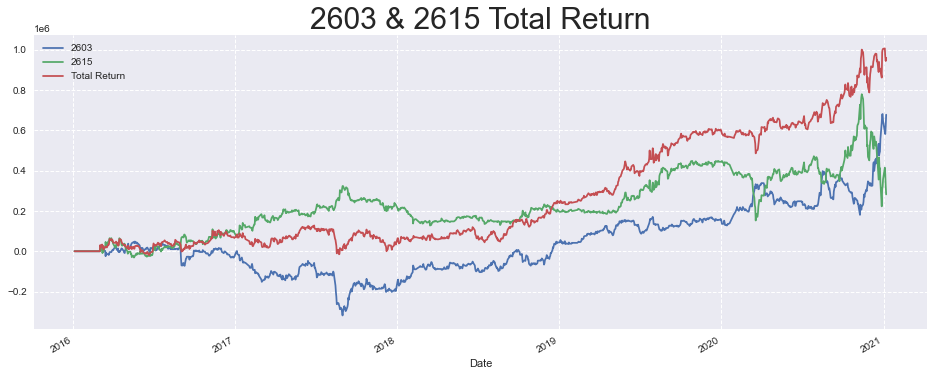

In [368]:
plt.figure(figsize=(16,6),dpi=100)
ax = cum_trade_return_df.plot(figsize=(16,6))
plt.grid(ls='--')
plt.title('{} & {} Total Return'.format(stock_1,stock_2),fontsize=30)

In [361]:
cum_trade_percent_return=(cum_trade_return_df['Total Return']/wealth)*100

Text(0.5, 1.0, 'Cumulative Return')

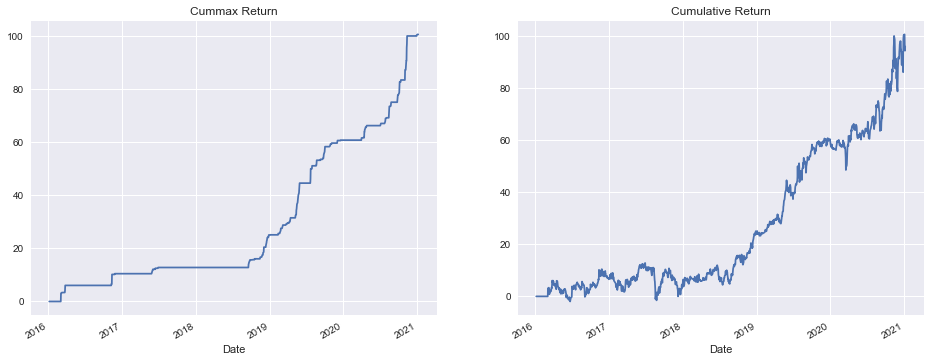

In [362]:
fig=plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
cum_trade_percent_return.cummax().plot()
plt.title('Cummax Return')
plt.subplot(1,2,2)
cum_trade_percent_return.plot()
plt.title('Cumulative Return')

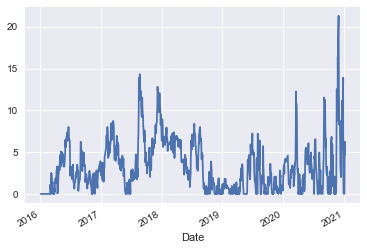

In [363]:
MDD_series=cum_trade_percent_return.cummax()-cum_trade_percent_return # MDD = 累積最高報酬和權益回落的差距
MDD_series.plot()

In [364]:
high_index=cum_trade_percent_return[cum_trade_percent_return.cummax()==cum_trade_percent_return].index

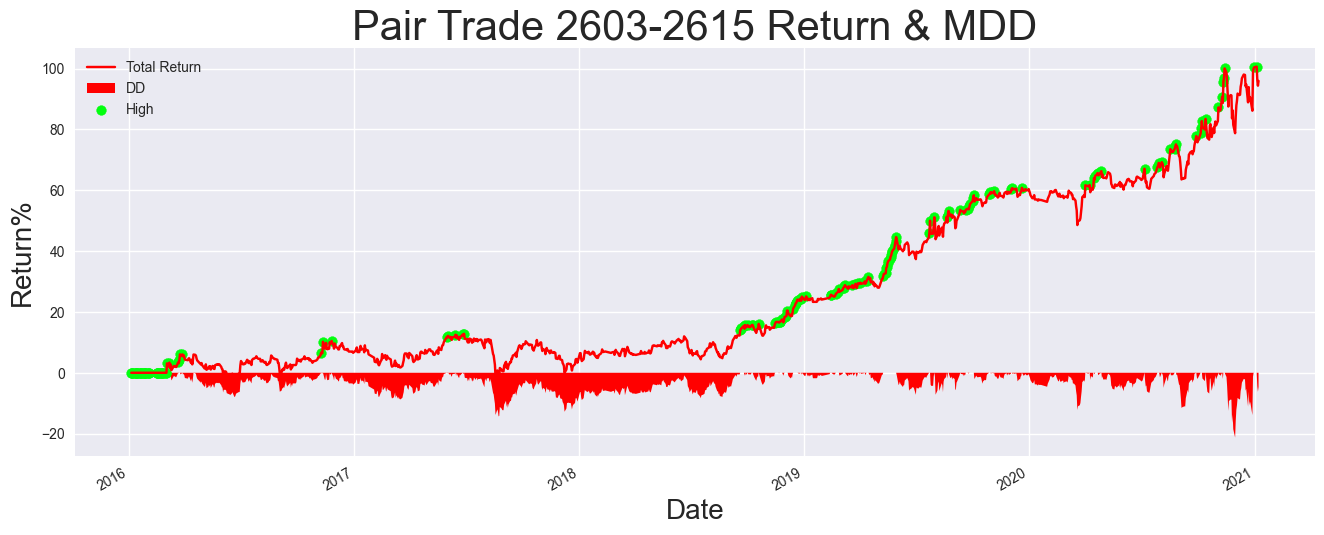

In [385]:
fig,ax=plt.subplots(figsize=(16,6),dpi=100)

(cum_trade_percent_return).plot(label='Total Return',ax=ax,c='r')
plt.fill_between(MDD_series.index,-MDD_series,0,facecolor='r',label='DD') # 
plt.scatter(high_index,cum_trade_percent_return.loc[high_index],c='#02ff0f',label='High') # 破新高 綠點點

plt.legend()
plt.ylabel('Return%',fontsize=20)
plt.xlabel('Date',fontsize=20)
plt.title('Pair Trade {}-{} Return & MDD'.format(stock_1,stock_2),fontsize=30);

In [386]:
MDD=round(MDD_series.max(),2) #最大策略虧損
Cumulative_Return=round(cum_trade_percent_return.iloc[-1],2) #round四捨五入至第2位
Return_on_MDD=round(cum_trade_percent_return.iloc[-1]/MDD_series.max(),2) 
daily_return=cum_trade_percent_return.diff(1)

print('Cumulative Return: {}%'.format(Cumulative_Return))
print('MDD: {}%'.format(MDD))
print('Return on MDD: {}'.format(Return_on_MDD))
print('Shapre Ratio: {}'.format(round((daily_return.mean()/daily_return.std())*pow(252,0.5),2))) #???

Cumulative Return: 95.97%
MDD: 21.3%
Return on MDD: 4.5
Shapre Ratio: 1.01
